In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib
import statistics
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import math
import glob
from itertools import combinations
from matplotlib import pyplot as plt
from Bio import Phylo
import biotite
from pca_plot import *

In [2]:
## Read and merge files 
anotation = pd.read_csv('../data/SGDP_anotation.csv', sep=',', encoding='latin-1')

ids_hg19 = pd.DataFrame()
ids_hg19['SAMPLE'] = anotation['3-Illumina_ID']
ids_hg19['REGION'] = anotation['10-Region']
ids_hg19['COUNTRY'] = anotation['11-Country']

In [3]:
####Results from chm13_data_gene_regions.py  
## Output is called in the next cell


In [8]:
chm13 = pd.read_csv('/branchinecta/jbazanwilliamson/cnv_analysis/chm13_gene_regions.csv', index_col=0)
chm13['LENGHT'] = chm13['END'] - chm13['START']
chm13 = chm13.drop(columns=['START_GENE', 'END_GENE'])
chm13 = chm13.drop_duplicates()
chm13#['TYPE'].value_counts()

/opt/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


SAMPLE   CHR      START        END  SCORE         TYPE  \
0        LP6005441-DNA_B02  chrX     105118     116978      1     DELETION   
18       LP6005441-DNA_B02  chrX    1038532    1048096      1     DELETION   
21       LP6005441-DNA_B02  chrX    1193541    1202443      1     DELETION   
24       LP6005441-DNA_B02  chrX    1296349    1304923      1     DELETION   
26       LP6005441-DNA_B02  chrX    1855267    1863572      1     DELETION   
...                    ...   ...        ...        ...    ...          ...   
1874421  LP6005442-DNA_H01  chr1  247606647  247620901      5  DUPLICATION   
1874427  LP6005442-DNA_H01  chr1  247629795  247637933      4  DUPLICATION   
1874430  LP6005442-DNA_H01  chr1  247738073  247750886      6  DUPLICATION   
1874432  LP6005442-DNA_H01  chr1  247954331  247967419      4  DUPLICATION   
1874434  LP6005442-DNA_H01  chr1  248159841  248170419      3  DUPLICATION   

         LENGHT  
0         11860  
18         9564  
21         8902  
24         8574  
26         8305  
...         ...  
1874421   14254  
1874427    8138  
1874430   12813  
1874432   13088  
1874434   10578  

[472598 rows x 7 columns]

In [12]:
## Filter by chromosomes
data_x = chm13[chm13.CHR == 'chrX']
data_no_sex_chr = chm13[chm13.CHR != 'chrY']
data_no_sex_chr = data_no_sex_chr[data_no_sex_chr.CHR != 'chrX']

data_no_sex_chr

SAMPLE    CHR      START        END  SCORE         TYPE  \
165      LP6005441-DNA_B02  chr22   18805936   18816025      1     DELETION   
166      LP6005441-DNA_B02  chr22   25035009   25045165      1     DELETION   
170      LP6005441-DNA_B02  chr22   25234701   25242766      1     DELETION   
176      LP6005441-DNA_B02  chr22   32151736   32167381      1     DELETION   
178      LP6005441-DNA_B02  chr22   33010661   33020973      1     DELETION   
...                    ...    ...        ...        ...    ...          ...   
1874421  LP6005442-DNA_H01   chr1  247606647  247620901      5  DUPLICATION   
1874427  LP6005442-DNA_H01   chr1  247629795  247637933      4  DUPLICATION   
1874430  LP6005442-DNA_H01   chr1  247738073  247750886      6  DUPLICATION   
1874432  LP6005442-DNA_H01   chr1  247954331  247967419      4  DUPLICATION   
1874434  LP6005442-DNA_H01   chr1  248159841  248170419      3  DUPLICATION   

         LENGHT  
165       10089  
166       10156  
170        8065  
176       15645  
178       10312  
...         ...  
1874421   14254  
1874427    8138  
1874430   12813  
1874432   13088  
1874434   10578  

[345958 rows x 7 columns]

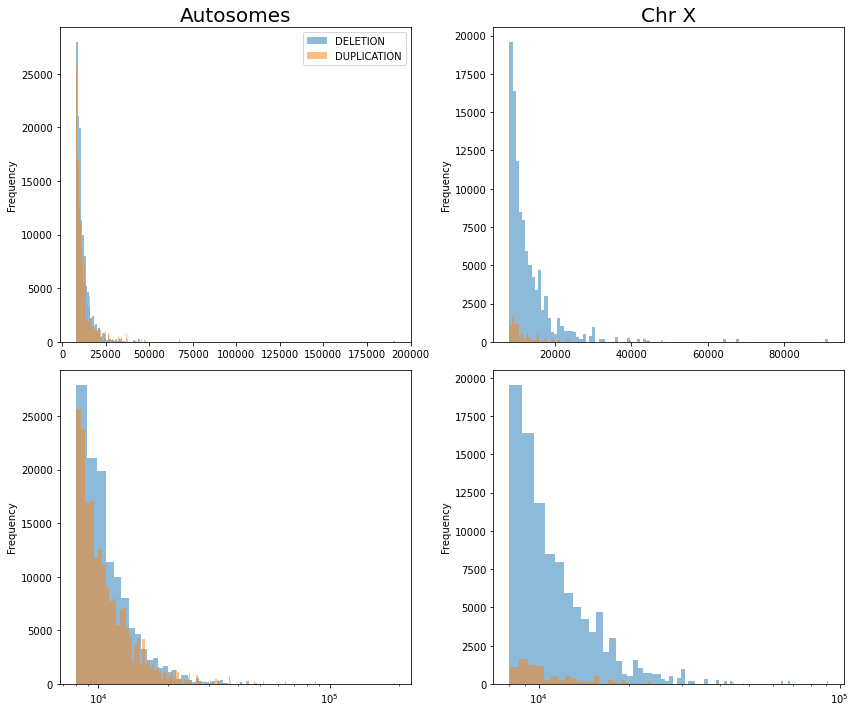

In [13]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(12, 10, forward=True)

axs[0, 0].set_title('Autosomes', size=20)

df1 = data_no_sex_chr.groupby(['TYPE'])['LENGHT']

df1.plot(kind='hist',stacked=True, bins=200, legend=True, ax=axs[0,0], xlabel='Size', alpha=0.5) # alpha for transparency
#plt.xlabel('Size')


df2 = data_no_sex_chr.groupby(['TYPE'])['LENGHT']

df2.plot(kind='hist',stacked=True, bins=200, logx=True, ax=axs[1,0], alpha=0.5) # alpha for transparency
#plt.xlabel('Size')


#fig.suptitle
axs[0, 1].set_title('Chr X', size=20)

df3 = data_x.groupby(['TYPE'])['LENGHT']

df3.plot(kind='hist',stacked=True, bins=100, ax=axs[0,1], alpha=0.5) # alpha for transparency

#plt.show()

df4 = data_x.groupby(['TYPE'])['LENGHT']

df4.plot(kind='hist',stacked=True, bins=100,logx=True, ax=axs[1,1], alpha=0.5) # alpha for transparency


fig.tight_layout() 
plt.savefig('../plots/distribution_chm13.png', transparent=True)
plt.show()

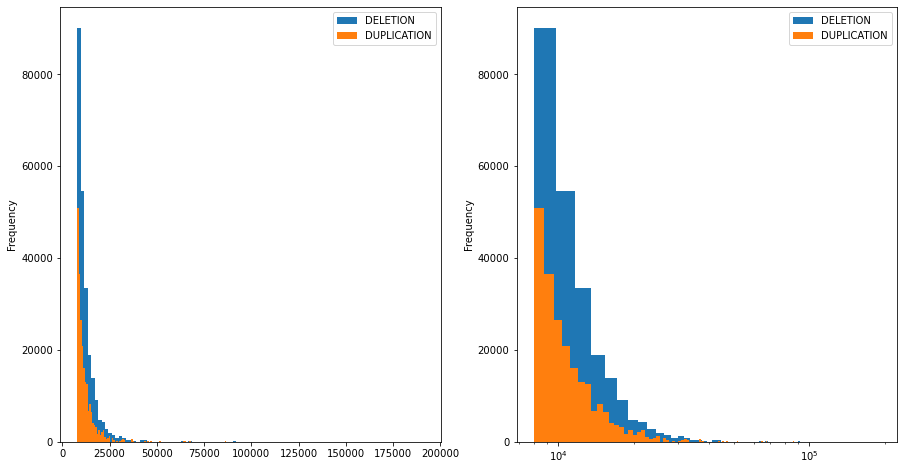

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

df_plot= chm13.groupby(['TYPE'])['LENGHT']

df_plot.plot(kind='hist',stacked=True, bins=100, legend=True, ax=axs[0]) # alpha for transparency

plt.xscale('log')
#plt.show()

df_plot = chm13.groupby(['TYPE'])['LENGHT']

df_plot.plot(kind='hist',stacked=True, bins=100, legend=True, ax=axs[1]) # alpha for transparency

plt.show()

In [18]:
#subsetting deletions and duplications
deletions = chm13[chm13['TYPE'] =='DELETION']
duplications = chm13[chm13['TYPE'] == 'DUPLICATION']
deletions

biallelic_duplications = duplications[duplications['SCORE'] < 5 ] 
biallelic_duplications

SAMPLE   CHR      START        END  SCORE         TYPE  \
961235   LP6005441-DNA_B02  chrX   12119426   12128395      3  DUPLICATION   
961243   LP6005441-DNA_B02  chrX   36927247   36935767      3  DUPLICATION   
961244   LP6005441-DNA_B02  chrX   36983761   36991872      3  DUPLICATION   
961248   LP6005441-DNA_B02  chrX   37359626   37379401      3  DUPLICATION   
961263   LP6005441-DNA_B02  chrX   45920595   45935886      3  DUPLICATION   
...                    ...   ...        ...        ...    ...          ...   
1874406  LP6005442-DNA_H01  chr1  244109432  244120542      3  DUPLICATION   
1874409  LP6005442-DNA_H01  chr1  246431276  246439465      3  DUPLICATION   
1874427  LP6005442-DNA_H01  chr1  247629795  247637933      4  DUPLICATION   
1874432  LP6005442-DNA_H01  chr1  247954331  247967419      4  DUPLICATION   
1874434  LP6005442-DNA_H01  chr1  248159841  248170419      3  DUPLICATION   

         LENGHT  
961235     8969  
961243     8520  
961244     8111  
961248    19775  
961263    15291  
...         ...  
1874406   11110  
1874409    8189  
1874427    8138  
1874432   13088  
1874434   10578  

[141130 rows x 7 columns]

In [19]:
#change to df when using telomeres and centromeres filtration
final_cnv = deletions.pivot_table(index=["CHR", "START", "END"], 
                    columns='SAMPLE', 
                    values='SCORE').reset_index()


#final_cnv = final_cnv.dropna(thresh=100)
final_cnv

SAMPLE   CHR     START       END  LP6005441-DNA_A01  LP6005441-DNA_A03  \
0       chr1    521722    540598                NaN                NaN   
1       chr1    839350    851555                NaN                NaN   
2       chr1   1041679   1050074                NaN                NaN   
3       chr1   1199726   1209870                NaN                NaN   
4       chr1   1382671   1391067                NaN                NaN   
...      ...       ...       ...                ...                ...   
8182    chrY  26436587  26458551                NaN                0.0   
8183    chrY  26778516  26788355                NaN                0.0   
8184    chrY  62325695  62345374                NaN                NaN   
8185    chrY  62345374  62363313                NaN                NaN   
8186    chrY  62411230  62422895                NaN                NaN   

SAMPLE  LP6005441-DNA_A04  LP6005441-DNA_A05  LP6005441-DNA_A06  \
0                     NaN                NaN                NaN   
1                     NaN                NaN                NaN   
2                     1.0                1.0                NaN   
3                     NaN                NaN                NaN   
4                     NaN                NaN                NaN   
...                   ...                ...                ...   
8182                  0.0                NaN                NaN   
8183                  0.0                NaN                NaN   
8184                  NaN                NaN                NaN   
8185                  NaN                NaN                NaN   
8186                  NaN                NaN                NaN   

SAMPLE  LP6005441-DNA_A08  LP6005441-DNA_A09  ...  LP6005677-DNA_D03  \
0                     NaN                NaN  ...                1.0   
1                     NaN                NaN  ...                NaN   
2                     1.0                NaN  ...                1.0   
3                     NaN                NaN  ...                NaN   
4                     NaN                NaN  ...                NaN   
...                   ...                ...  ...                ...   
8182                  NaN                NaN  ...                0.0   
8183                  NaN                NaN  ...                0.0   
8184                  NaN                1.0  ...                NaN   
8185                  NaN                1.0  ...                NaN   
8186                  NaN                1.0  ...                NaN   

SAMPLE  LP6005677-DNA_E01  LP6005677-DNA_F01  LP6005677-DNA_G01  \
0                     NaN                NaN                NaN   
1                     1.0                NaN                NaN   
2                     NaN                NaN                NaN   
3                     NaN                NaN                NaN   
4                     NaN                1.0                NaN   
...                   ...                ...                ...   
8182                  NaN                0.0                NaN   
8183                  NaN                0.0                NaN   
8184                  NaN                NaN                NaN   
8185                  NaN                NaN                NaN   
8186                  NaN                NaN                NaN   

SAMPLE  LP6007068-DNA_A01  LP6007069-DNA_A01  SS6004471  SS6004477  SS6004478  \
0                     NaN                NaN        1.0        NaN        1.0   
1                     NaN                NaN        NaN        NaN        NaN   
2                     1.0                1.0        1.0        NaN        NaN   
3                     NaN                NaN        1.0        1.0        NaN   
4                     NaN                NaN        NaN        NaN        NaN   
...                   ...                ...        ...        ...        ...   
8182                  NaN                0.0        NaN        NaN   

In [20]:
from scipy import stats
#final_cnv = final_cnv.iloc[new]
final = final_cnv.iloc[:,3:284]
counts = final
counts = counts.fillna(2)

#counts = counts[counts.columns.intersection(counts_a.columns)]

#counts = counts.drop(columns=['LP6005592-DNA_G03',
#                     'LP6005443-DNA_E10',
#                     'LP6005442-DNA_E04'])

counts = counts.T
counts = counts.sort_index()
counts

0     1     2     3     4     5     6     7     8     9     \
SAMPLE                                                                          
LP6005441-DNA_A01   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
LP6005441-DNA_A03   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
LP6005441-DNA_A04   2.0   2.0   1.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
LP6005441-DNA_A05   2.0   2.0   1.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
LP6005441-DNA_A06   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
LP6007069-DNA_A01   2.0   2.0   1.0   2.0   2.0   2.0   2.0   2.0   1.0   1.0   
SS6004471           1.0   2.0   1.0   1.0   2.0   2.0   2.0   2.0   1.0   1.0   
SS6004477           2.0   2.0   2.0   1.0   2.0   2.0   2.0   2.0   1.0   1.0   
SS6004478           1.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   1.0   1.0   
SS6004480           1.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   1.0   1.0   

                   ...  8177  8178  8179  8180  8181  8182  8183  8184  8185  \
SAMPLE             ...                                                         
LP6005441-DNA_A01  ...   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
LP6005441-DNA_A03  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0   2.0   
LP6005441-DNA_A04  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0   2.0   
LP6005441-DNA_A05  ...   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
LP6005441-DNA_A06  ...   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
LP6007069-DNA_A01  ...   0.0   0.0   0.0   1.0   1.0   0.0   0.0   2.0   2.0   
SS6004471          ...   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
SS6004477          ...   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
SS6004478          ...   0.0   0.0   0.0   1.0   0.0   0.0   0.0   2.0   2.0   
SS6004480          ...   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   

                   8186  
SAMPLE                   
LP6005441-DNA_A01   2.0  
LP6005441-DNA_A03   2.0  
LP6005441-DNA_A04   2.0  
LP6005441-DNA_A05   2.0  
LP6005441-DNA_A06   2.0  
...                 ...  
LP6007069-DNA_A01   2.0  
SS6004471           2.0  
SS6004477           2.0  
SS6004478           2.0  
SS6004480           2.0  

[269 rows x 8187 columns]

In [21]:
features = ids_hg19.set_index('SAMPLE').merge(counts, left_index=True, right_index=True)
features = features.loc[:,['REGION', 'COUNTRY']]
features = features.sort_index()
features 

REGION           COUNTRY
SAMPLE                                          
LP6005441-DNA_A01  WestEurasia  Russia(Caucasus)
LP6005441-DNA_A03      Oceania    PapuaNewGuinea
LP6005441-DNA_A04      America          Colombia
LP6005441-DNA_A05  WestEurasia            France
LP6005441-DNA_A06  WestEurasia    Italy(Bergamo)
...                        ...               ...
LP6007069-DNA_A01  WestEurasia            Greece
SS6004471               Africa             Congo
SS6004477              Oceania         Australia
SS6004478              Oceania         Australia
SS6004480               Africa             Sudan

[269 rows x 2 columns]

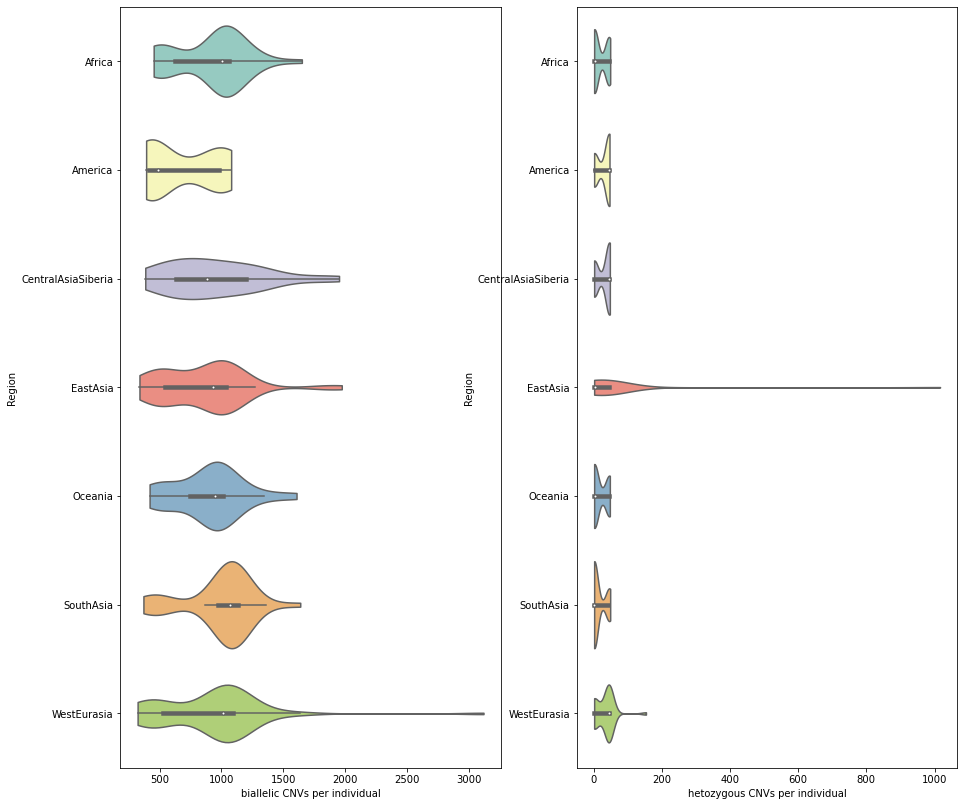

In [22]:
#import seaborn as sns

#pd.set_option("display.max_rows", None, "display.max_columns", None)
biallelic_deletions = deletions[deletions['SCORE'] < 2 ] 
biallelic_deletions = biallelic_deletions.groupby('SAMPLE').size()

biallelic_deletions = pd.DataFrame(biallelic_deletions)
#biallelic_deletions = biallelic_deletions.set_index('SAMPLE')

biallelic_deletions = features.merge(biallelic_deletions, left_index=True, right_index=True)
#biallelic_deletions = biallelic_deletions.reset_index()

#heterozygous_deletions.value_counts('SAMPLE').sort_index()
biallelic_deletions.columns = ['REGION', 'COUNTRY','TYPE']
biallelic_deletions


#pd.set_option("display.max_rows", None, "display.max_columns", None)
heterozygous_deletions = deletions[deletions['SCORE'] < 1] 
heterozygous_deletions = heterozygous_deletions.groupby('SAMPLE').size()
heterozygous_deletions = pd.DataFrame(heterozygous_deletions)
heterozygous_deletions = features.merge(heterozygous_deletions, left_index=True, right_index=True)
heterozygous_deletions.columns = ['REGION','COUNTRY', 'TYPE']
heterozygous_deletions
heterozygous_deletions


fig, axs = plt.subplots(1, 2, figsize=(15, 14))

ax = seaborn.violinplot(x="TYPE", y="REGION", data=biallelic_deletions, palette='Set3', order=[ "Africa","America", "CentralAsiaSiberia","EastAsia", "Oceania", "SouthAsia", "WestEurasia"], ax=axs[0], cut=0)

ax.set_xlabel("biallelic CNVs per individual")
ax.set_ylabel("Region")

ax = seaborn.violinplot(x="TYPE", y="REGION", data=heterozygous_deletions, palette='Set3', order=[ "Africa","America", "CentralAsiaSiberia","EastAsia", "Oceania", "SouthAsia", "WestEurasia"], ax=axs[1], cut=0)

ax.set_xlabel("hetozygous CNVs per individual")
ax.set_ylabel("Region")
plt.show()

In [23]:
#track features for pca & tsne
from sklearn import preprocessing

#X =preprocessing.scale(counts)

#PCA
pca = PCA(n_components=10)
pca_results = pca.fit_transform(counts)

df_pca= pd.DataFrame(pca_results,
                          columns=['component_1','component_2', 'component_3', 'component_4',
                                  'component_5',
                                  'component_6',
                                  'component_7',
                                  'component_8',
                                  'component_9',
                                   'component_10'
                                  ],
                          index=features.index)




df_pca = features.merge(df_pca, left_index=True, right_index=True)
df_pca

REGION           COUNTRY  component_1  component_2  \
SAMPLE                                                                       
LP6005441-DNA_A01  WestEurasia  Russia(Caucasus)    -9.728542    -1.296218   
LP6005441-DNA_A03      Oceania    PapuaNewGuinea    16.131562     1.278144   
LP6005441-DNA_A04      America          Colombia    16.097766    -2.714843   
LP6005441-DNA_A05  WestEurasia            France    -9.676231    -4.993266   
LP6005441-DNA_A06  WestEurasia    Italy(Bergamo)    -9.863429    -4.716570   
...                        ...               ...          ...          ...   
LP6007069-DNA_A01  WestEurasia            Greece    13.830281     6.005109   
SS6004471               Africa             Congo    -9.603699     5.770453   
SS6004477              Oceania         Australia    -9.619161     7.587067   
SS6004478              Oceania         Australia    15.282295     5.635296   
SS6004480               Africa             Sudan    -9.742277     1.852122   

                   component_3  component_4  component_5  component_6  \
SAMPLE                                                                  
LP6005441-DNA_A01    -0.105812    -0.480084    -0.911635     1.041031   
LP6005441-DNA_A03    -0.739625     0.000083    -0.672907     1.408390   
LP6005441-DNA_A04     0.667438    -0.305188    -0.500437     0.306552   
LP6005441-DNA_A05     0.711536    -0.696709    -0.562402     0.780873   
LP6005441-DNA_A06     0.851307    -1.302474    -0.219034     0.595786   
...                        ...          ...          ...          ...   
LP6007069-DNA_A01    -1.734057     3.320696    15.633174    -3.453627   
SS6004471            -0.663818     3.591535    16.792016     3.910494   
SS6004477            -1.223745     2.697498    13.534461     3.508278   
SS6004478            -1.161998     2.610717    15.244725    -0.422067   
SS6004480            -1.231995     1.550724    11.892480    -0.076983   

                   component_7  component_8  component_9  component_10  
SAMPLE                                                                  
LP6005441-DNA_A01    -0.936175     0.159980     0.147376     -0.782093  
LP6005441-DNA_A03    -0.852951    -0.119774     1.500212      0.719723  
LP6005441-DNA_A04    -0.074145     0.411213     0.340295     -0.809065  
LP6005441-DNA_A05     1.814408     0.122268    -2.034542      0.377749  
LP6005441-DNA_A06     0.712040    -0.039079    -0.772326     -0.215396  
...                        ...          ...          ...           ...  
LP6007069-DNA_A01     2.661155    -1.429701    -2.181483     -0.473435  
SS6004471             1.505275     2.041925     3.552794      2.792698  
SS6004477            -0.767842     0.655146     4.126247     -0.498632  
SS6004478             1.470163     0.439805     1.520550      1.696595  
SS6004480             1.969682    -2.398310    -5.181252     -0.434896  

[269 rows x 12 columns]

In [24]:
pca.explained_variance_ratio_

array([0.32232299, 0.0438211 , 0.02930827, 0.02362963, 0.01226472,
       0.00821702, 0.00676957, 0.00624383, 0.00590659, 0.00537968])

                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -9.728542    -1.296218    -0.105812   
Oceania        PapuaNewGuinea    16.131562     1.278144    -0.739625   
America              Colombia    16.097766    -2.714843     0.667438   
WestEurasia            France    -9.676231    -4.993266     0.711536   
WestEurasia    Italy(Bergamo)    -9.863429    -4.716570     0.851307   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.830281     6.005109    -1.734057   
Africa                  Congo    -9.603699     5.770453    -0.663818   
Oceania             Australia    -9.619161     7.587067    -1.223745   
Oceania             Australia    15.282295     5.635296    -1.161998   
Africa                  Sudan    -9.742277     1.852122    -1.231995   

             component_4  component_5  component_6  component_7

                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -9.728542    -1.296218    -0.105812   
Oceania        PapuaNewGuinea    16.131562     1.278144    -0.739625   
America              Colombia    16.097766    -2.714843     0.667438   
WestEurasia            France    -9.676231    -4.993266     0.711536   
WestEurasia    Italy(Bergamo)    -9.863429    -4.716570     0.851307   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.830281     6.005109    -1.734057   
Africa                  Congo    -9.603699     5.770453    -0.663818   
Oceania             Australia    -9.619161     7.587067    -1.223745   
Oceania             Australia    15.282295     5.635296    -1.161998   
Africa                  Sudan    -9.742277     1.852122    -1.231995   

             component_4  component_5  component_6  component_7

                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -9.728542    -1.296218    -0.105812   
Oceania        PapuaNewGuinea    16.131562     1.278144    -0.739625   
America              Colombia    16.097766    -2.714843     0.667438   
WestEurasia            France    -9.676231    -4.993266     0.711536   
WestEurasia    Italy(Bergamo)    -9.863429    -4.716570     0.851307   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.830281     6.005109    -1.734057   
Africa                  Congo    -9.603699     5.770453    -0.663818   
Oceania             Australia    -9.619161     7.587067    -1.223745   
Oceania             Australia    15.282295     5.635296    -1.161998   
Africa                  Sudan    -9.742277     1.852122    -1.231995   

             component_4  component_5  component_6  component_7

[269 rows x 11 columns]
Count of groups by factor: 7
                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -9.728542    -1.296218    -0.105812   
Oceania        PapuaNewGuinea    16.131562     1.278144    -0.739625   
America              Colombia    16.097766    -2.714843     0.667438   
WestEurasia            France    -9.676231    -4.993266     0.711536   
WestEurasia    Italy(Bergamo)    -9.863429    -4.716570     0.851307   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.830281     6.005109    -1.734057   
Africa                  Congo    -9.603699     5.770453    -0.663818   
Oceania             Australia    -9.619161     7.587067    -1.223745   
Oceania             Australia    15.282295     5.635296    -1.161998   
Africa                  Sudan    -9.742277     1.852122    -1.231995   

          

/branchinecta/jbazanwilliamson/cnv_analysis/cnv_sgdp/scripts/pca_plot.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  tight_layout=True


                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -9.728542    -1.296218    -0.105812   
Oceania        PapuaNewGuinea    16.131562     1.278144    -0.739625   
America              Colombia    16.097766    -2.714843     0.667438   
WestEurasia            France    -9.676231    -4.993266     0.711536   
WestEurasia    Italy(Bergamo)    -9.863429    -4.716570     0.851307   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.830281     6.005109    -1.734057   
Africa                  Congo    -9.603699     5.770453    -0.663818   
Oceania             Australia    -9.619161     7.587067    -1.223745   
Oceania             Australia    15.282295     5.635296    -1.161998   
Africa                  Sudan    -9.742277     1.852122    -1.231995   

             component_4  component_5  component_6  component_7

[269 rows x 11 columns]
Count of groups by factor: 7
                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -9.728542    -1.296218    -0.105812   
Oceania        PapuaNewGuinea    16.131562     1.278144    -0.739625   
America              Colombia    16.097766    -2.714843     0.667438   
WestEurasia            France    -9.676231    -4.993266     0.711536   
WestEurasia    Italy(Bergamo)    -9.863429    -4.716570     0.851307   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.830281     6.005109    -1.734057   
Africa                  Congo    -9.603699     5.770453    -0.663818   
Oceania             Australia    -9.619161     7.587067    -1.223745   
Oceania             Australia    15.282295     5.635296    -1.161998   
Africa                  Sudan    -9.742277     1.852122    -1.231995   

          

[269 rows x 11 columns]
Count of groups by factor: 7
                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -9.728542    -1.296218    -0.105812   
Oceania        PapuaNewGuinea    16.131562     1.278144    -0.739625   
America              Colombia    16.097766    -2.714843     0.667438   
WestEurasia            France    -9.676231    -4.993266     0.711536   
WestEurasia    Italy(Bergamo)    -9.863429    -4.716570     0.851307   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.830281     6.005109    -1.734057   
Africa                  Congo    -9.603699     5.770453    -0.663818   
Oceania             Australia    -9.619161     7.587067    -1.223745   
Oceania             Australia    15.282295     5.635296    -1.161998   
Africa                  Sudan    -9.742277     1.852122    -1.231995   

          

[269 rows x 11 columns]
Count of groups by factor: 7
                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -9.728542    -1.296218    -0.105812   
Oceania        PapuaNewGuinea    16.131562     1.278144    -0.739625   
America              Colombia    16.097766    -2.714843     0.667438   
WestEurasia            France    -9.676231    -4.993266     0.711536   
WestEurasia    Italy(Bergamo)    -9.863429    -4.716570     0.851307   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.830281     6.005109    -1.734057   
Africa                  Congo    -9.603699     5.770453    -0.663818   
Oceania             Australia    -9.619161     7.587067    -1.223745   
Oceania             Australia    15.282295     5.635296    -1.161998   
Africa                  Sudan    -9.742277     1.852122    -1.231995   

          

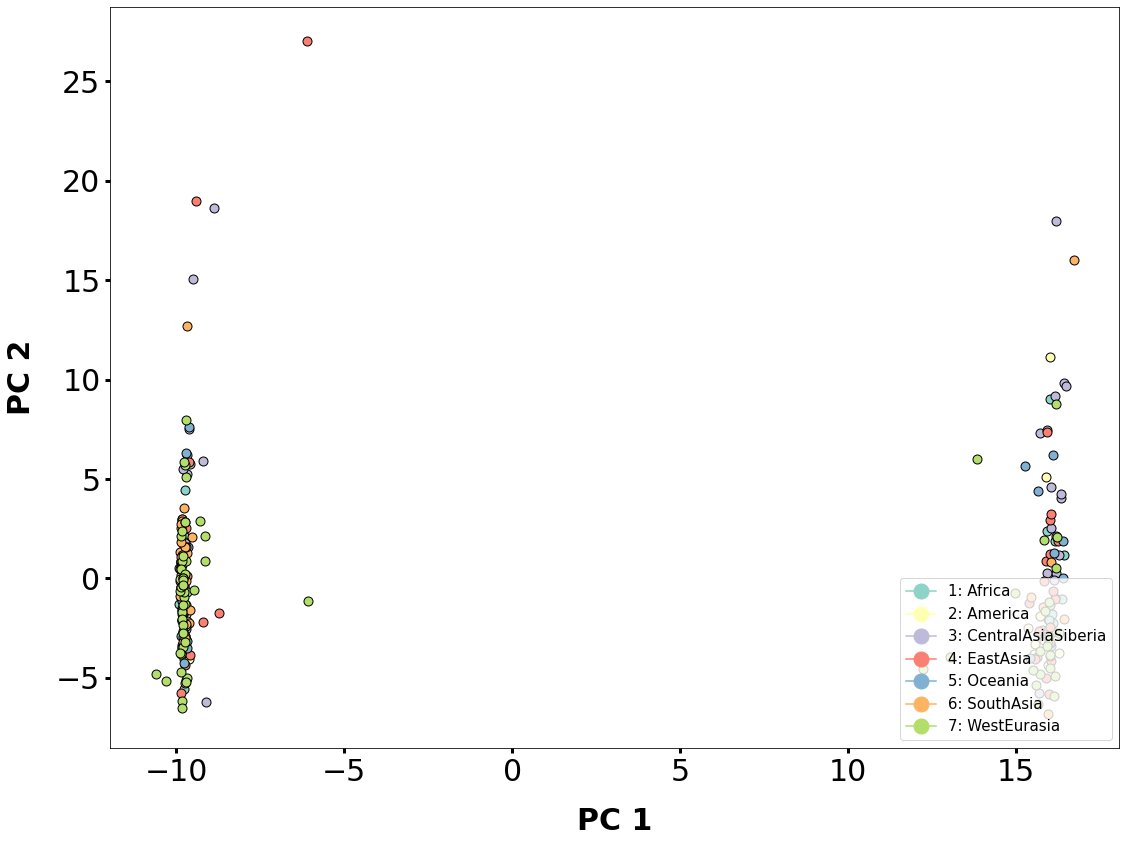

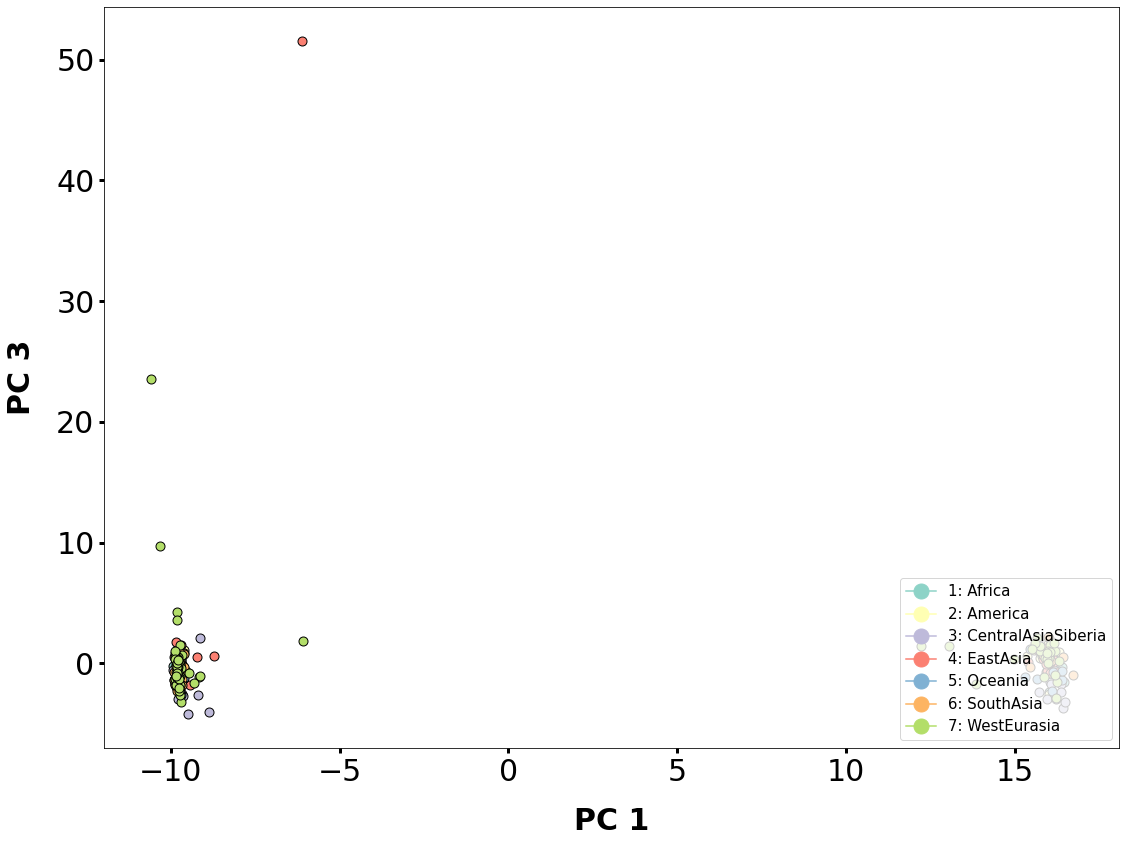

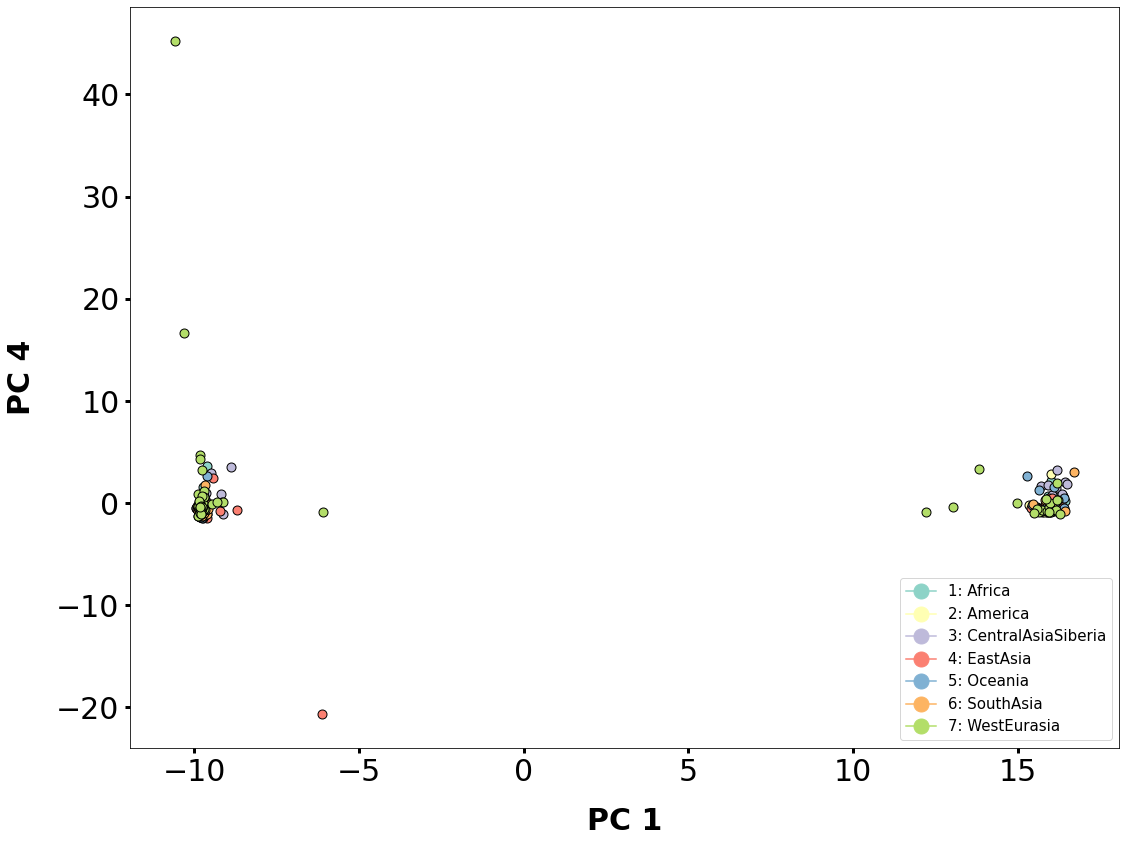

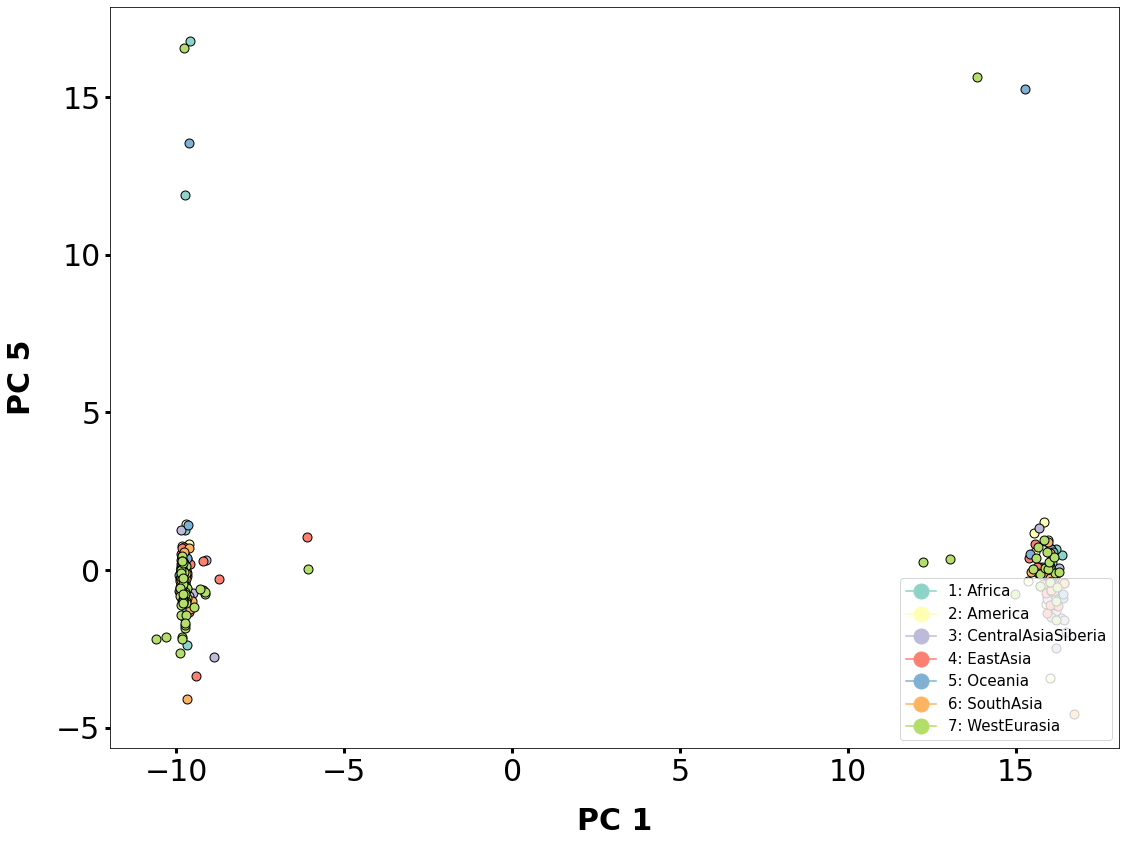

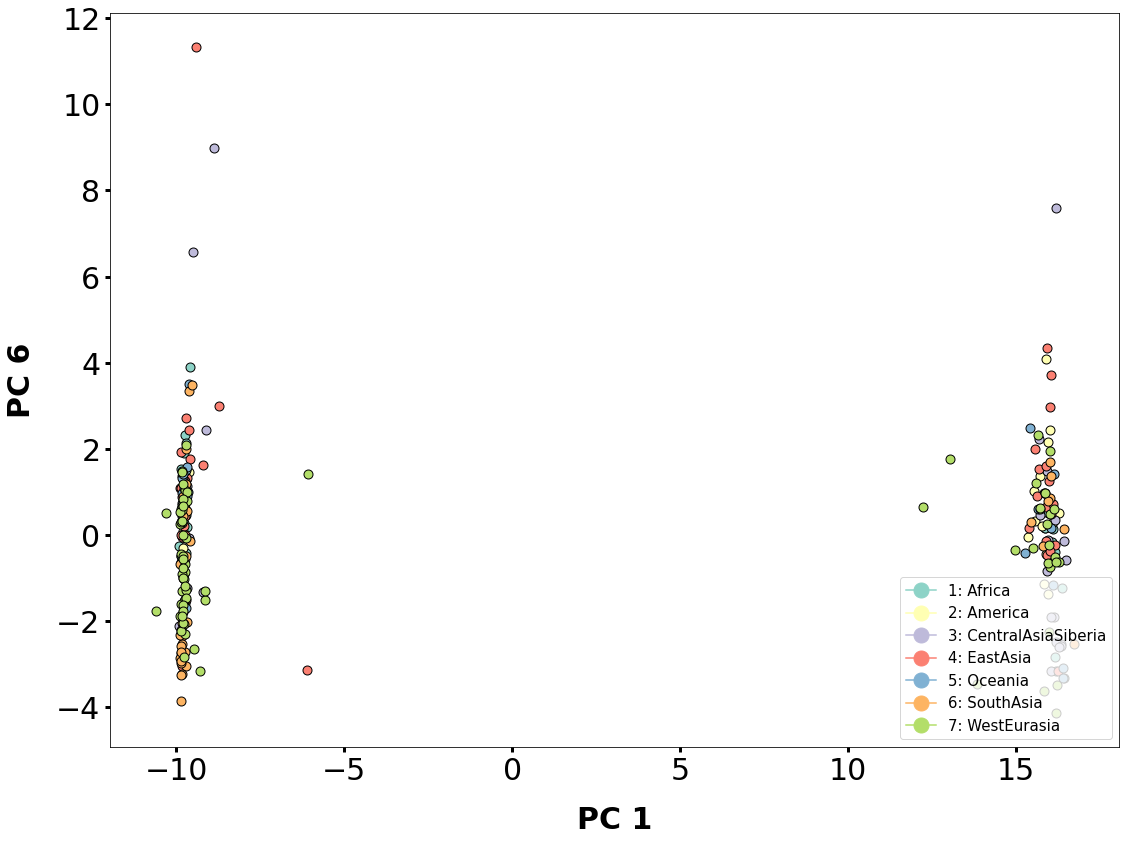

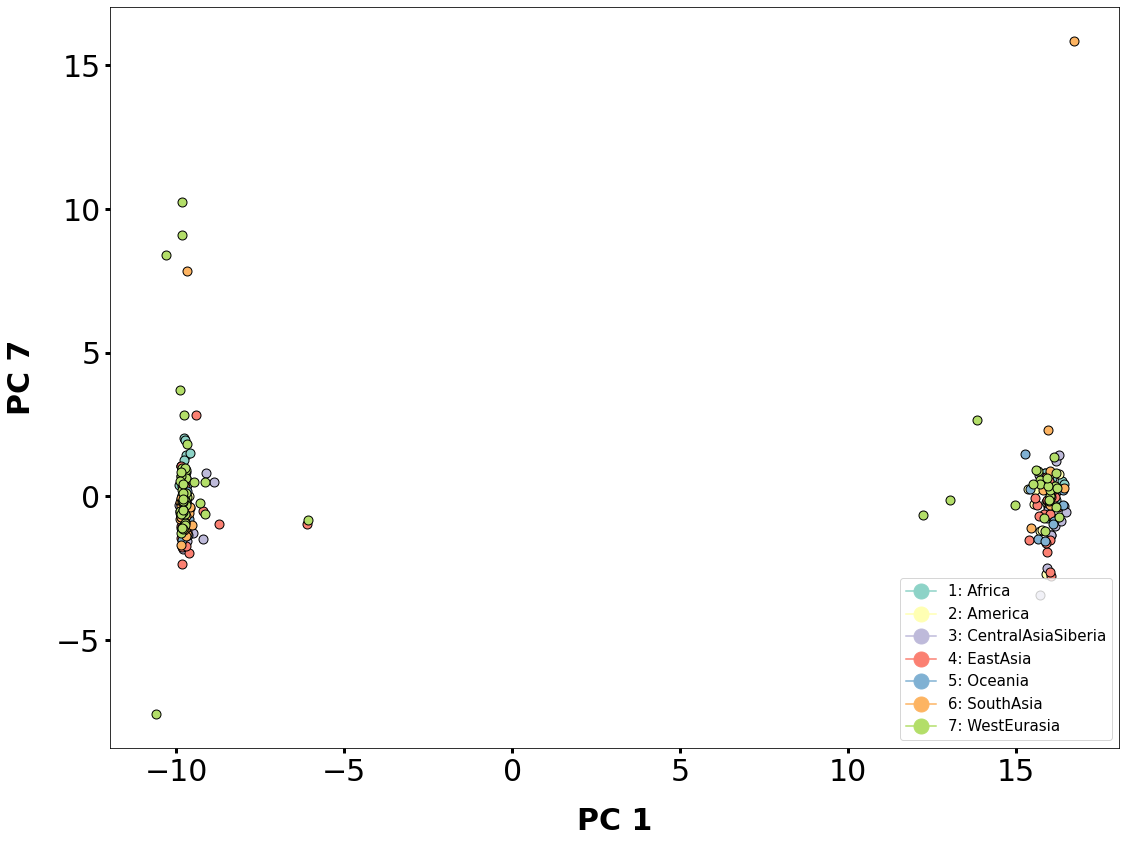

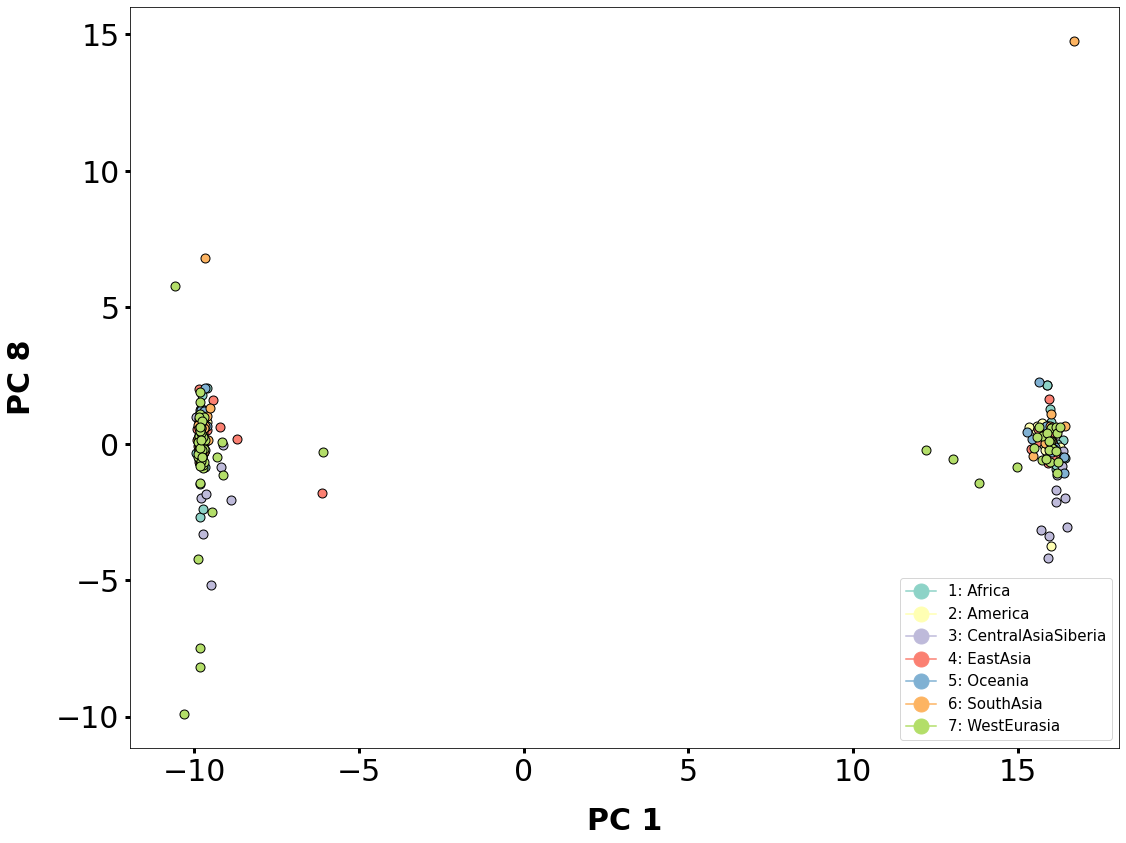

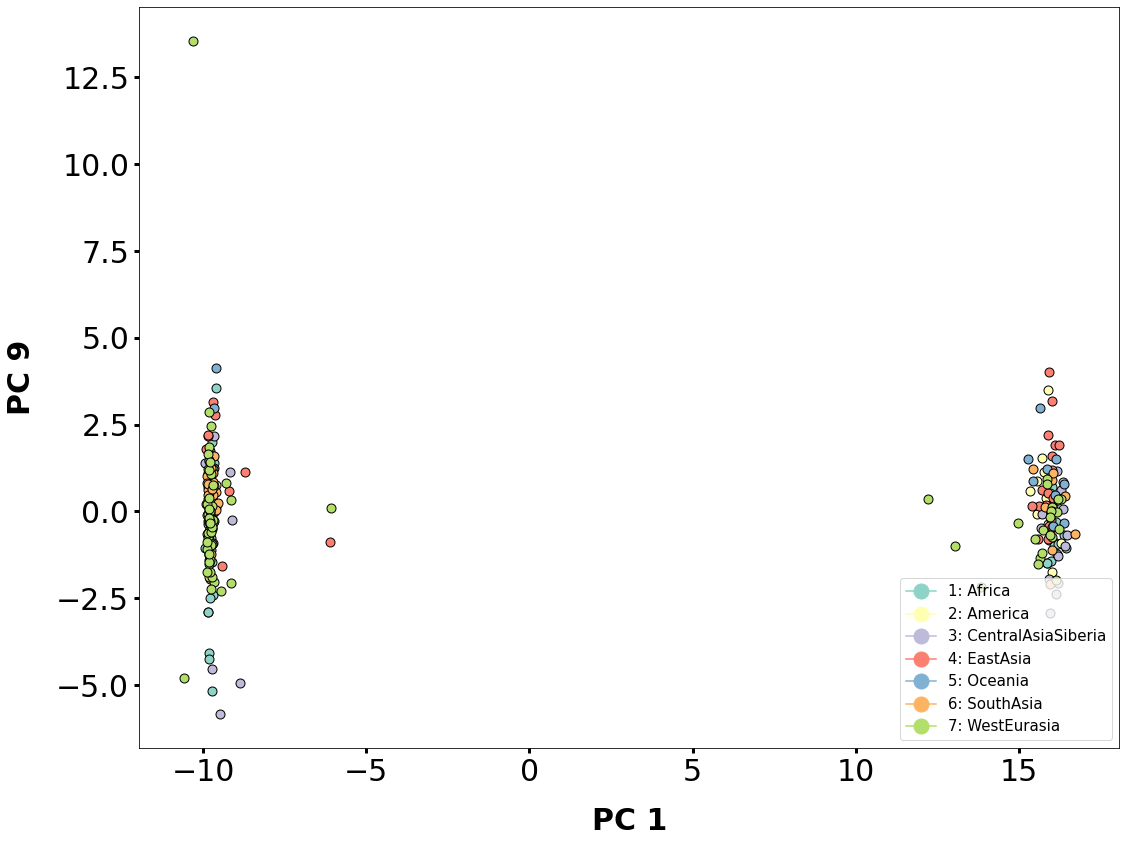

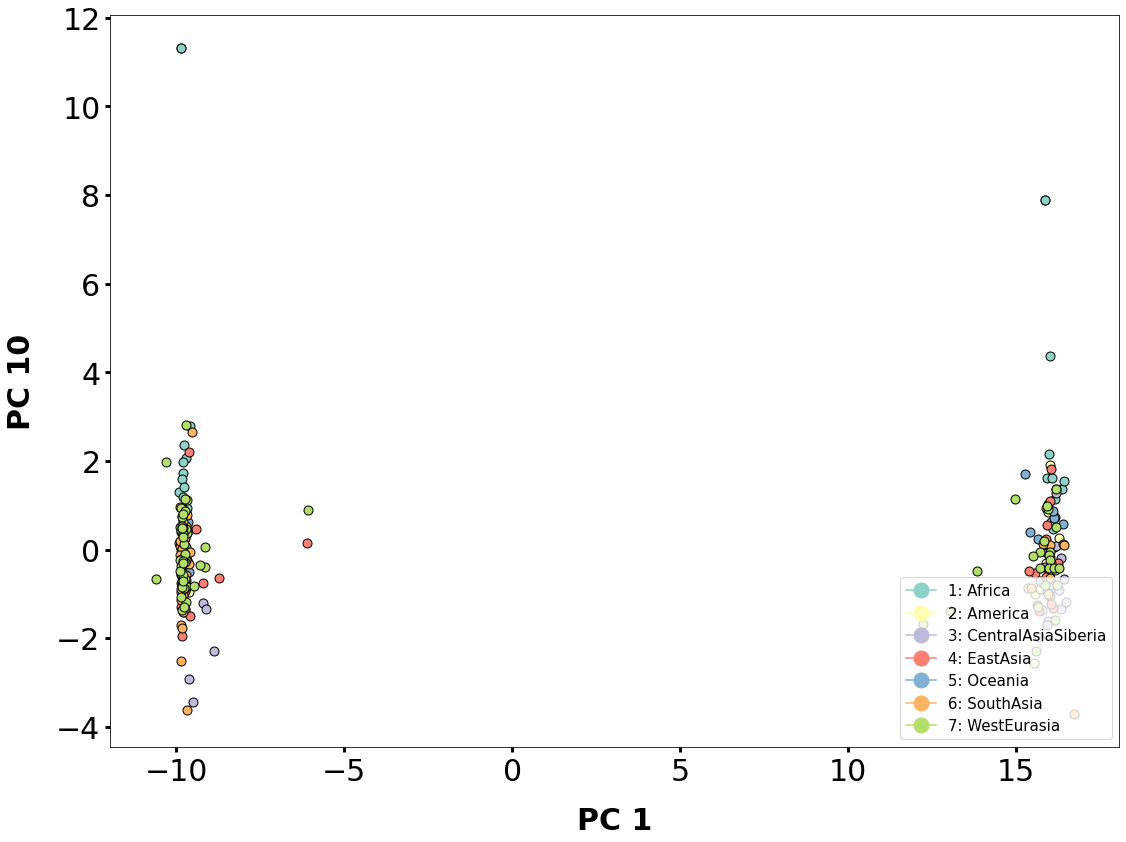

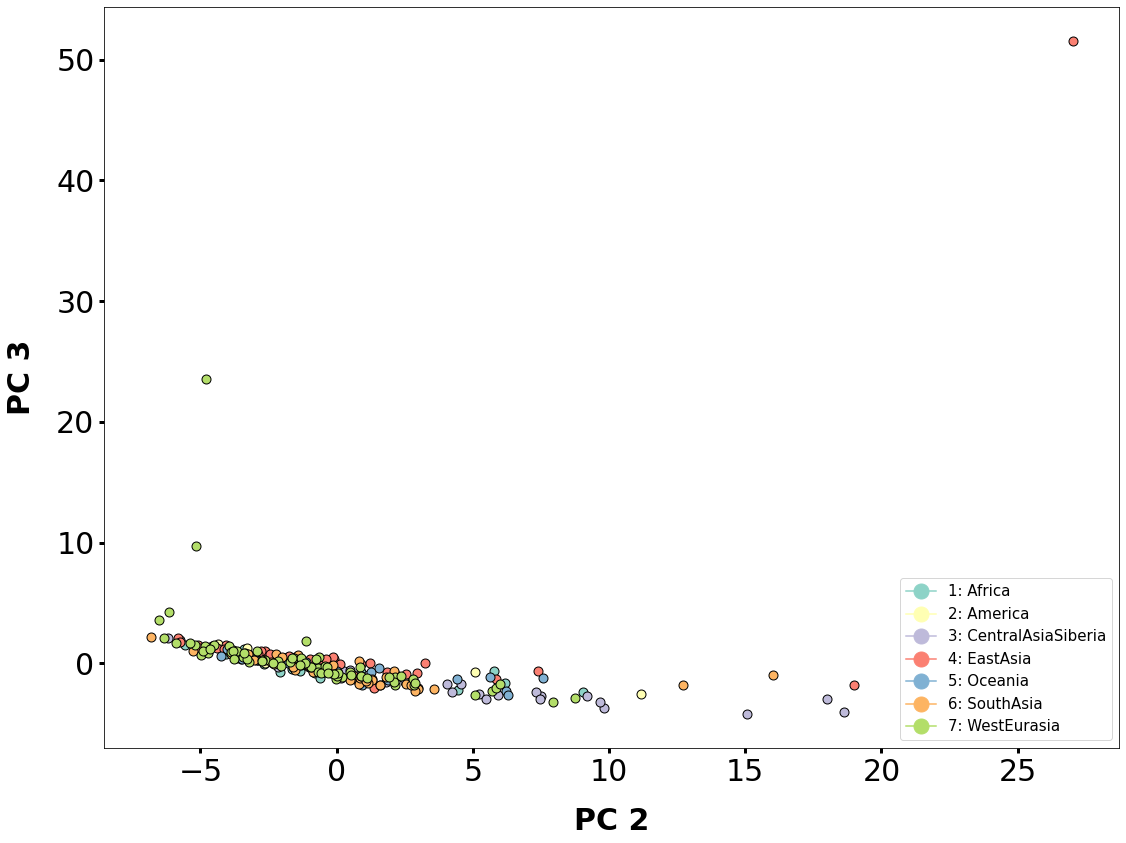

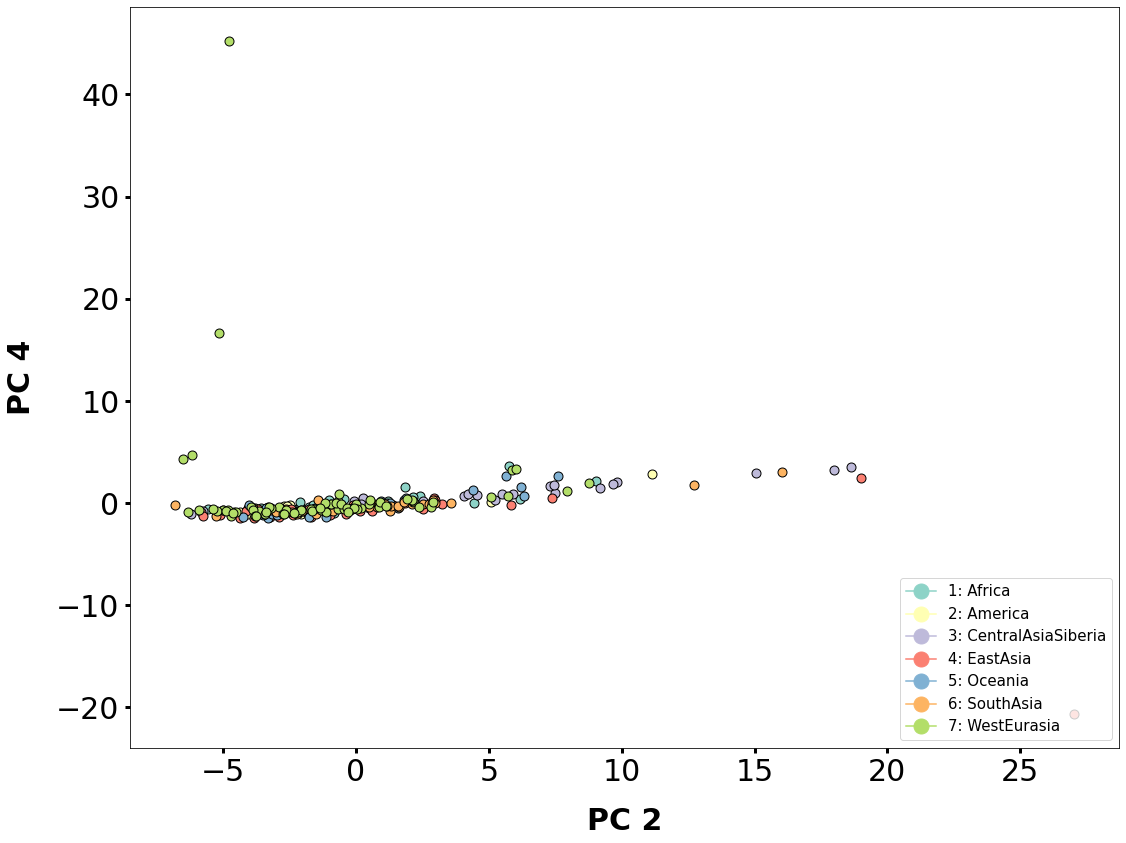

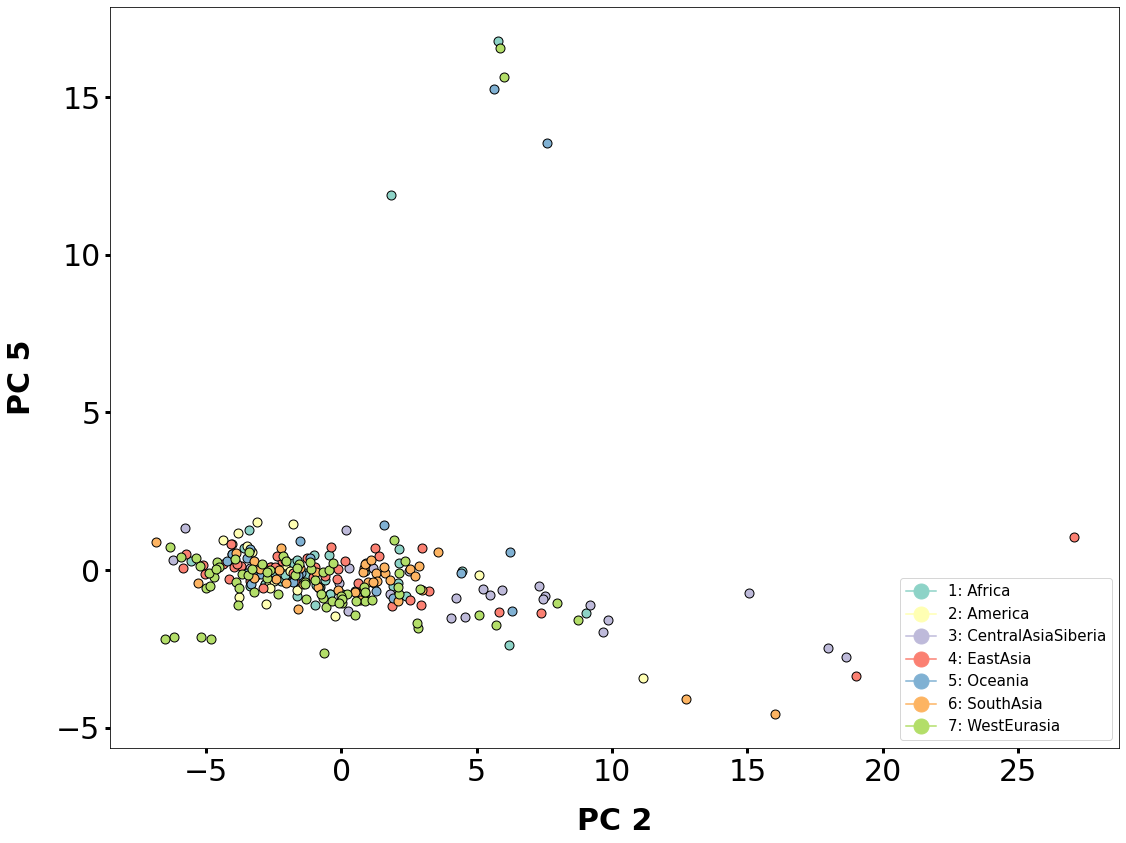

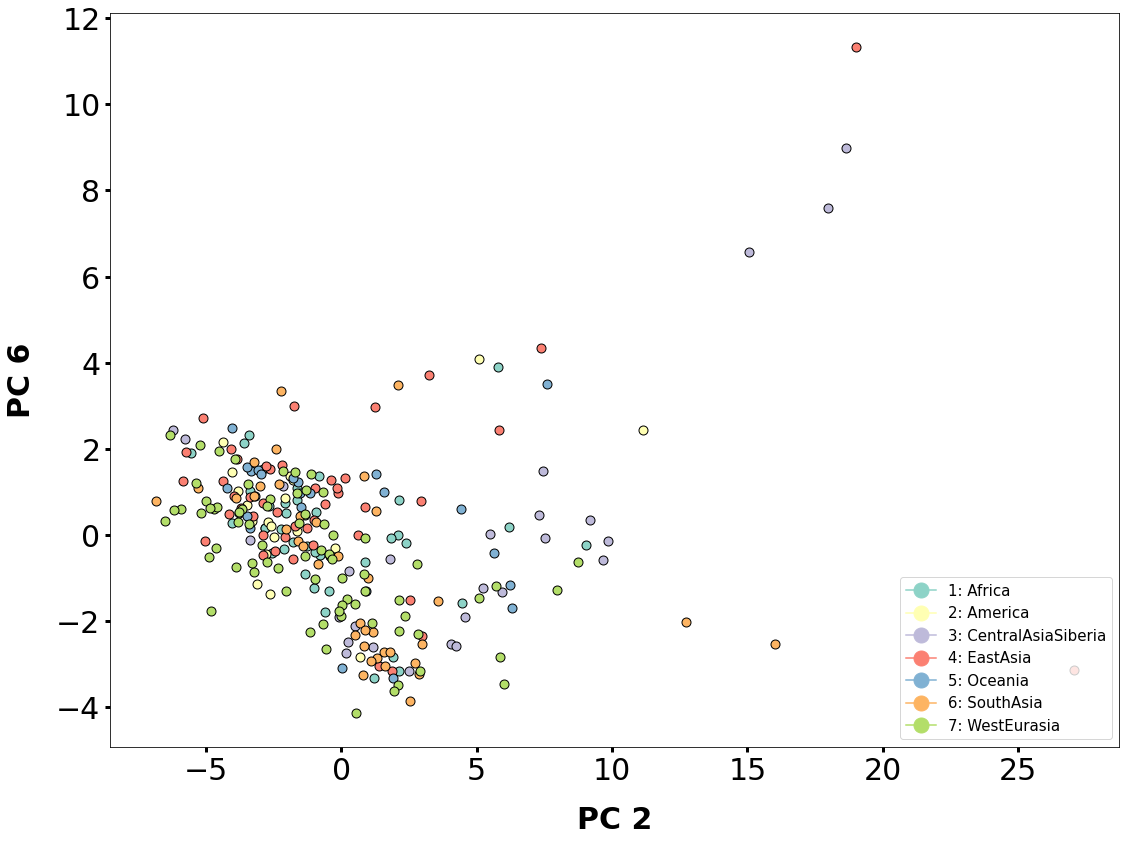

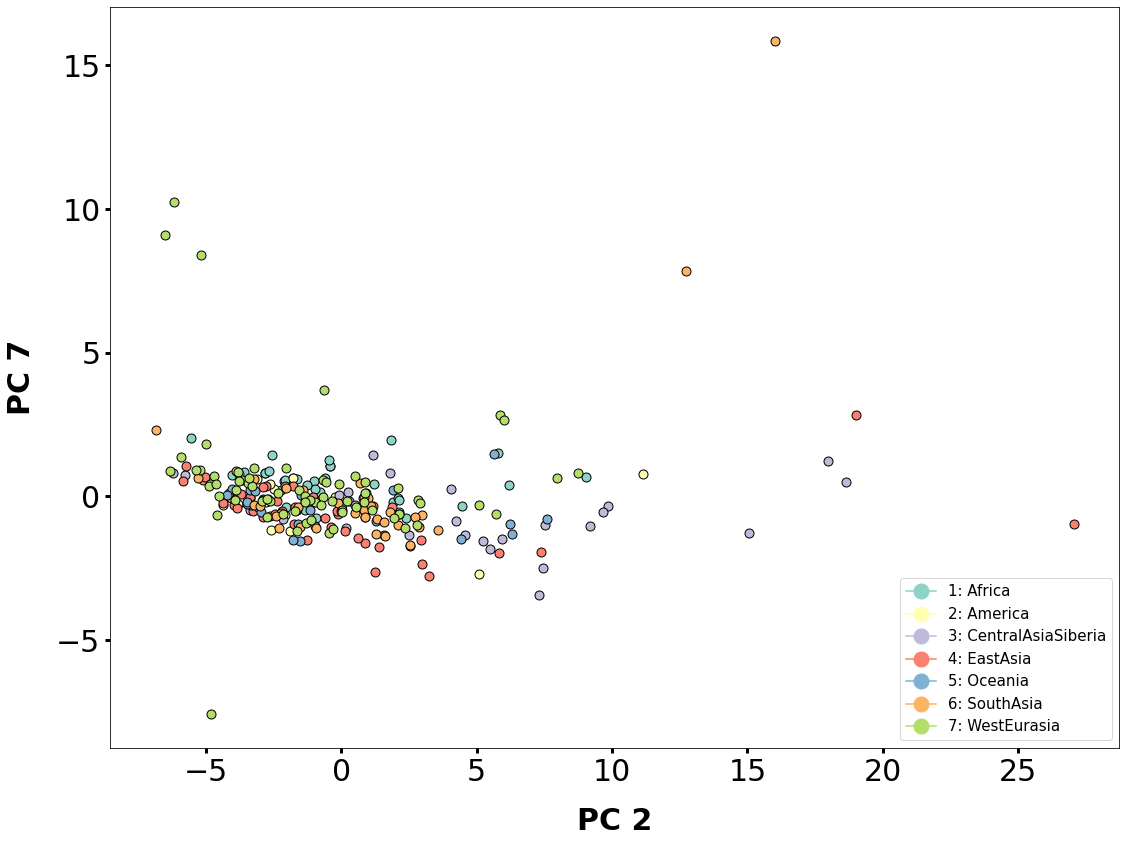

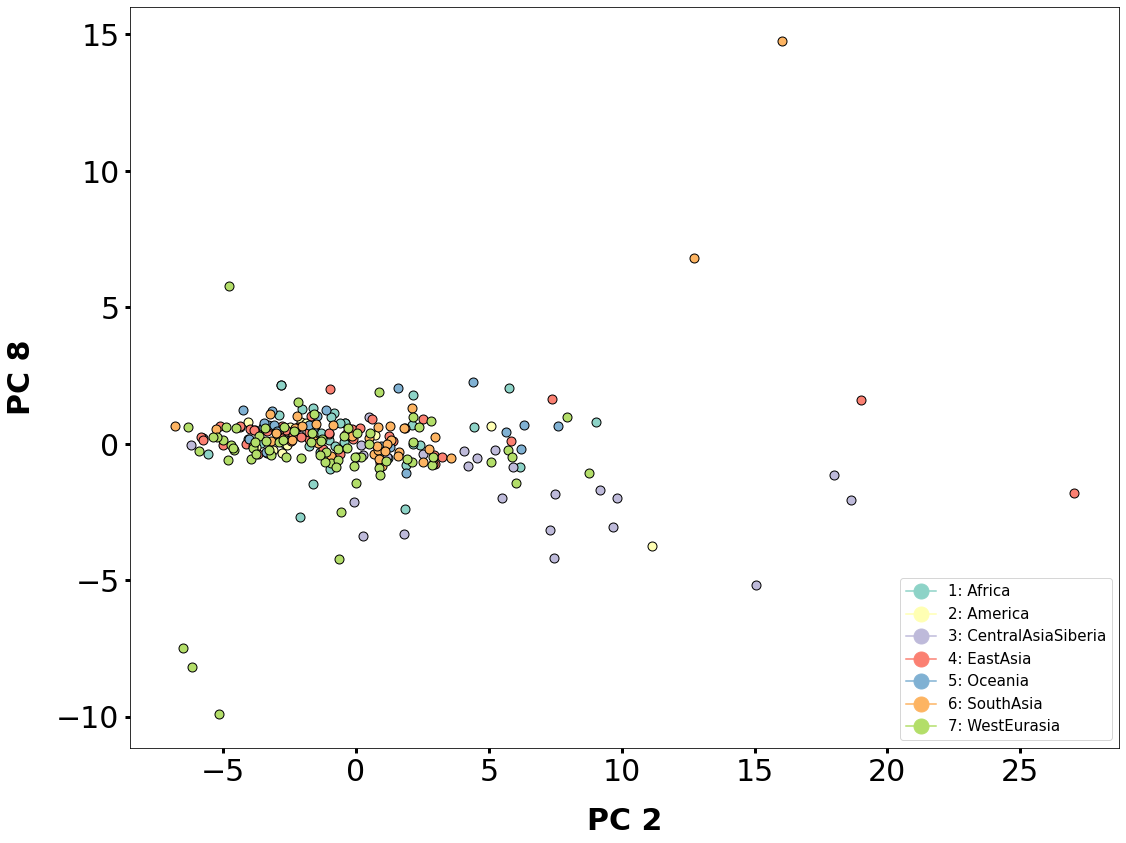

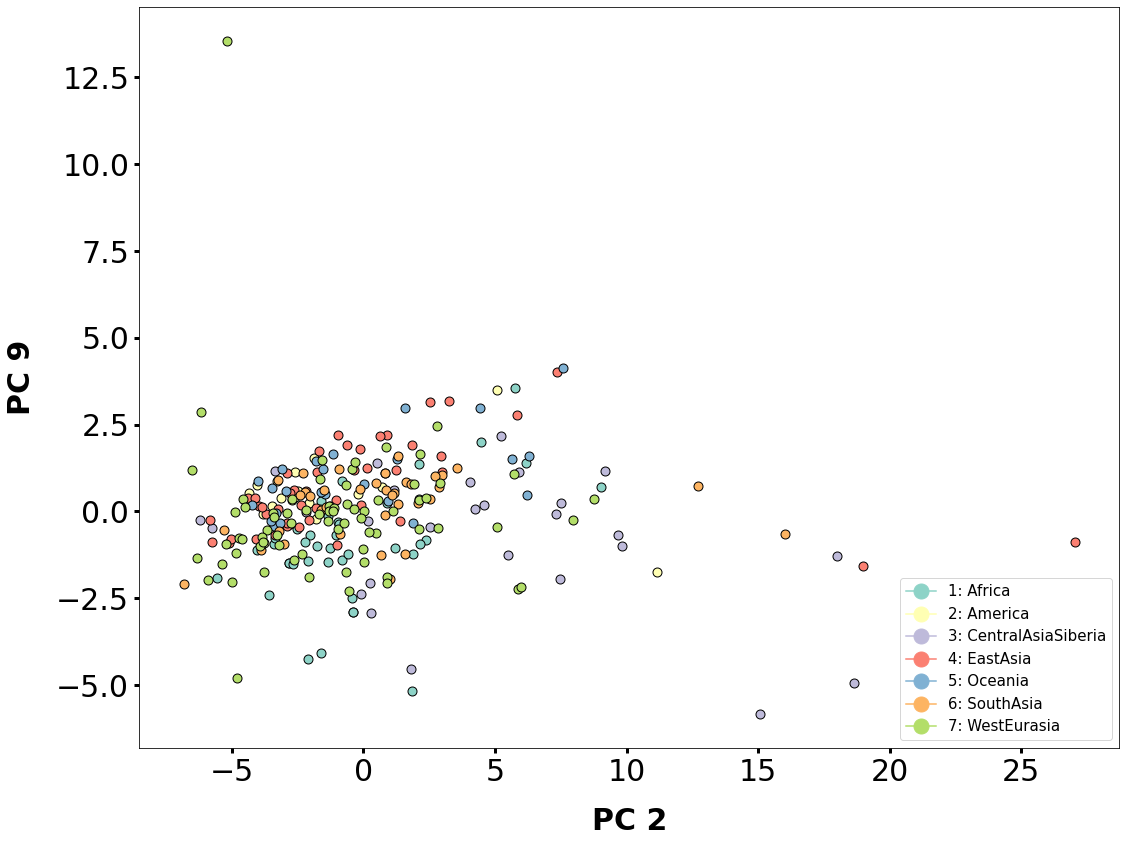

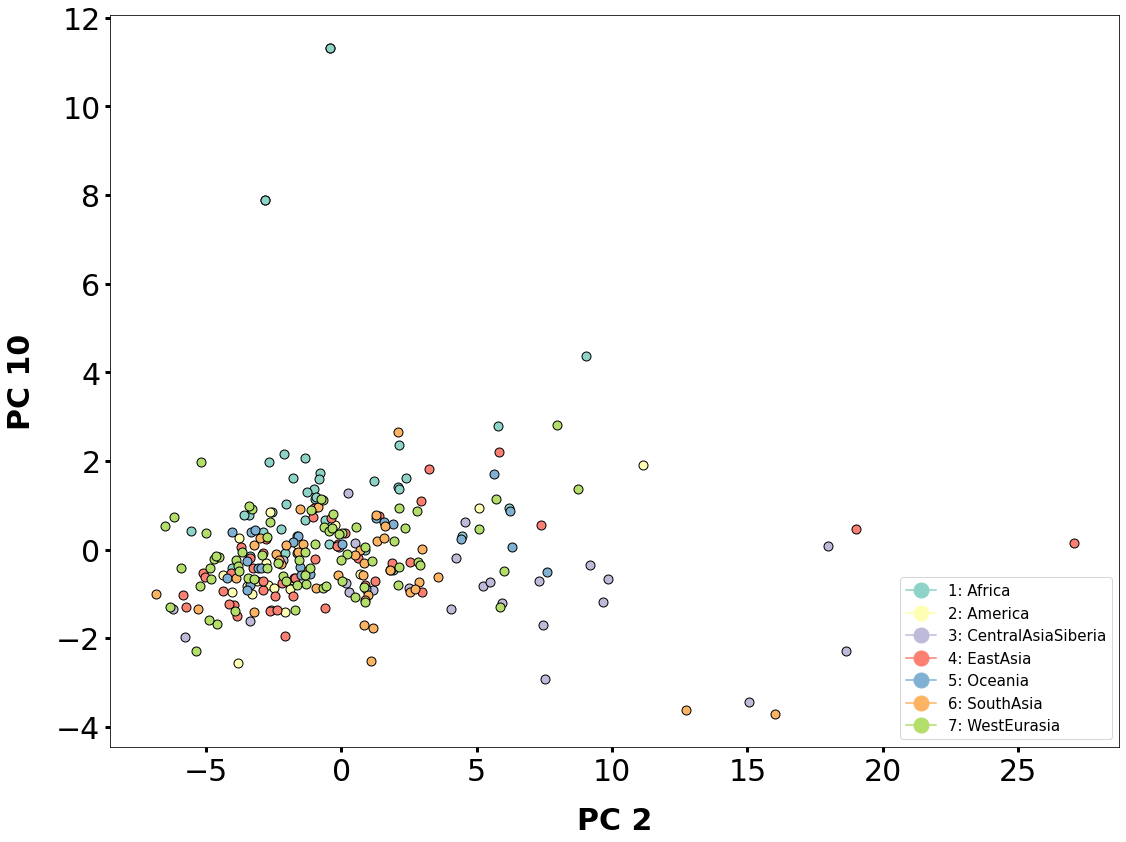

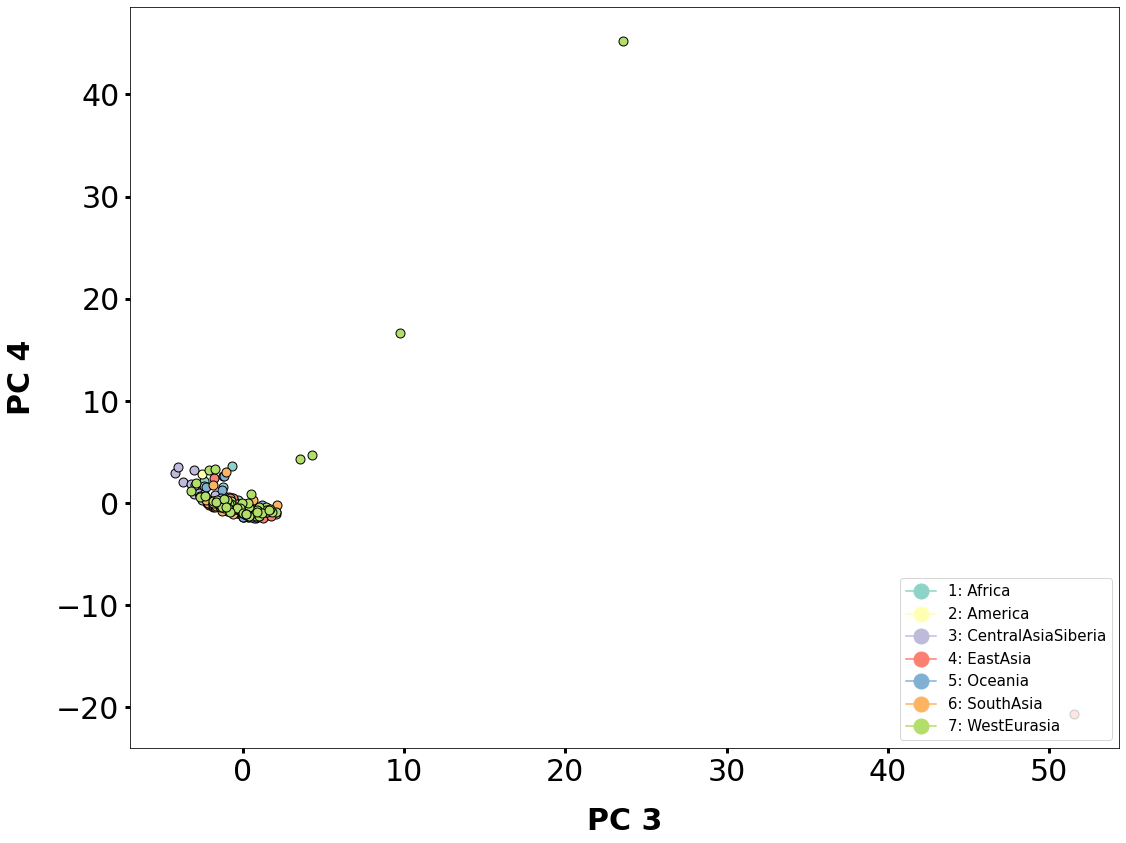

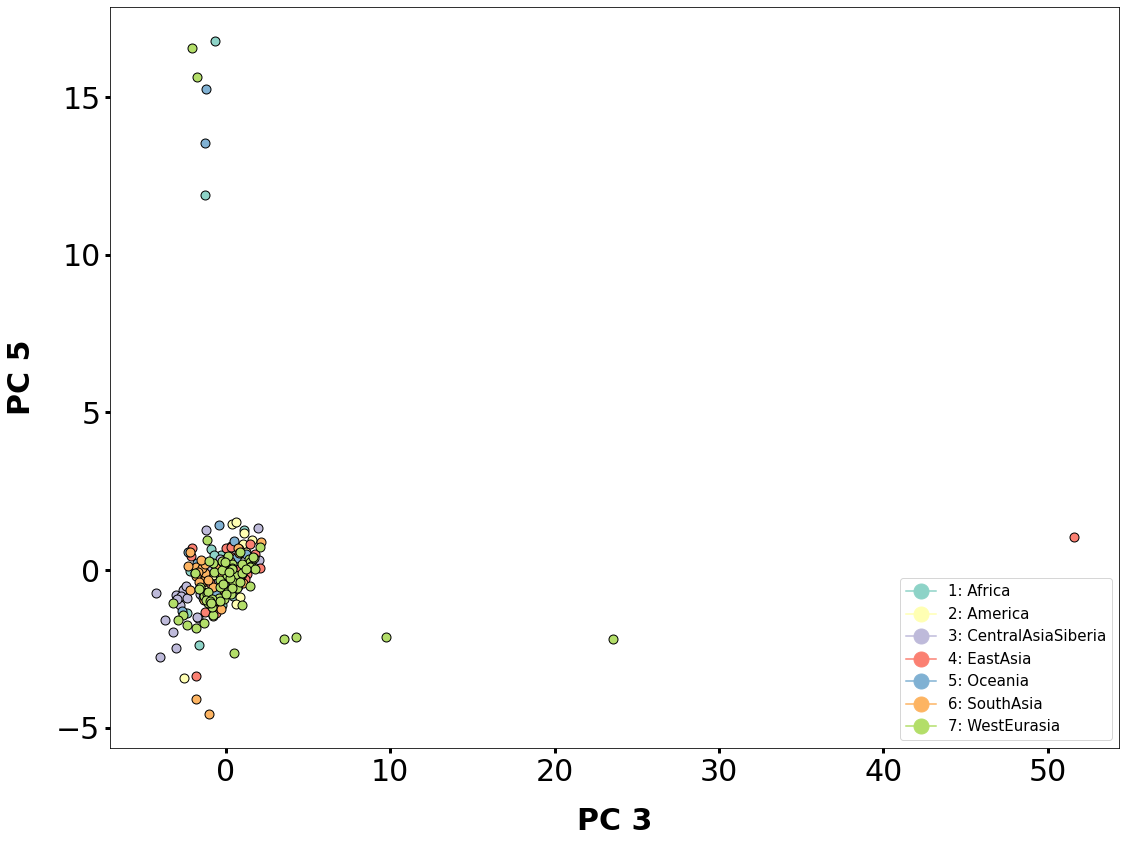

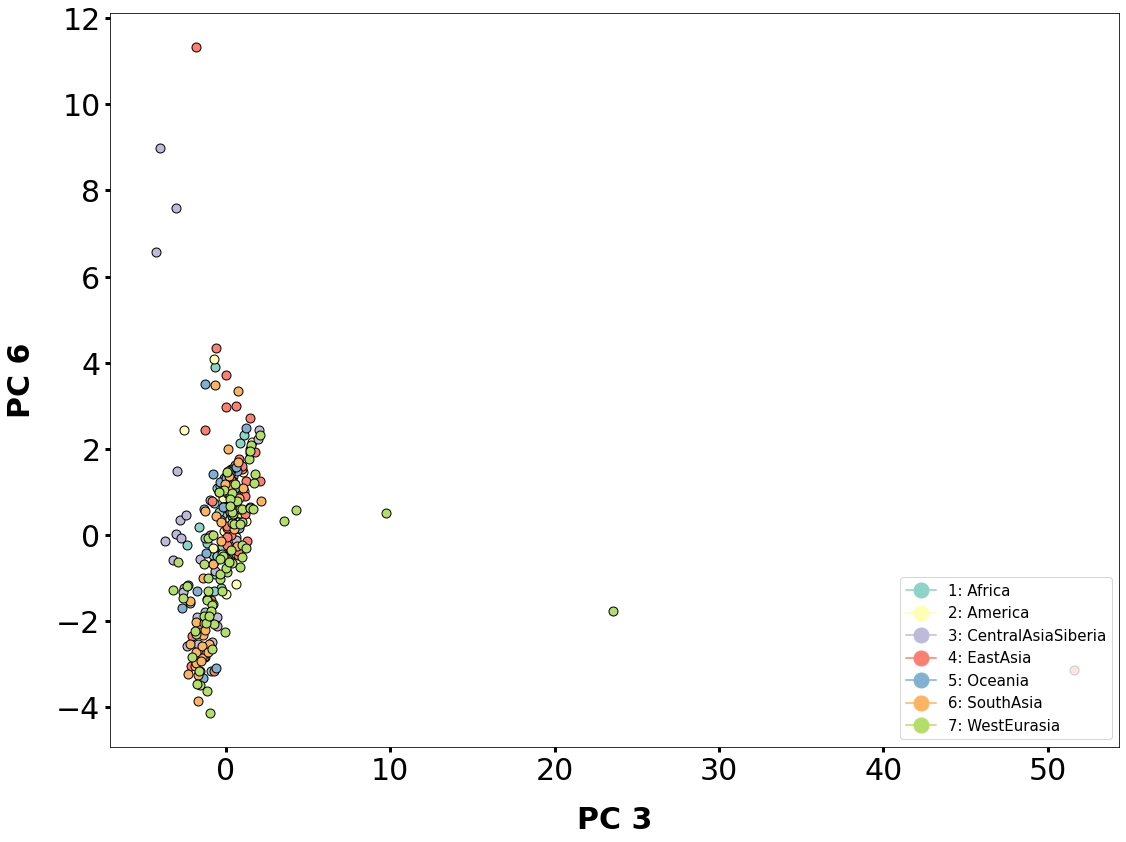

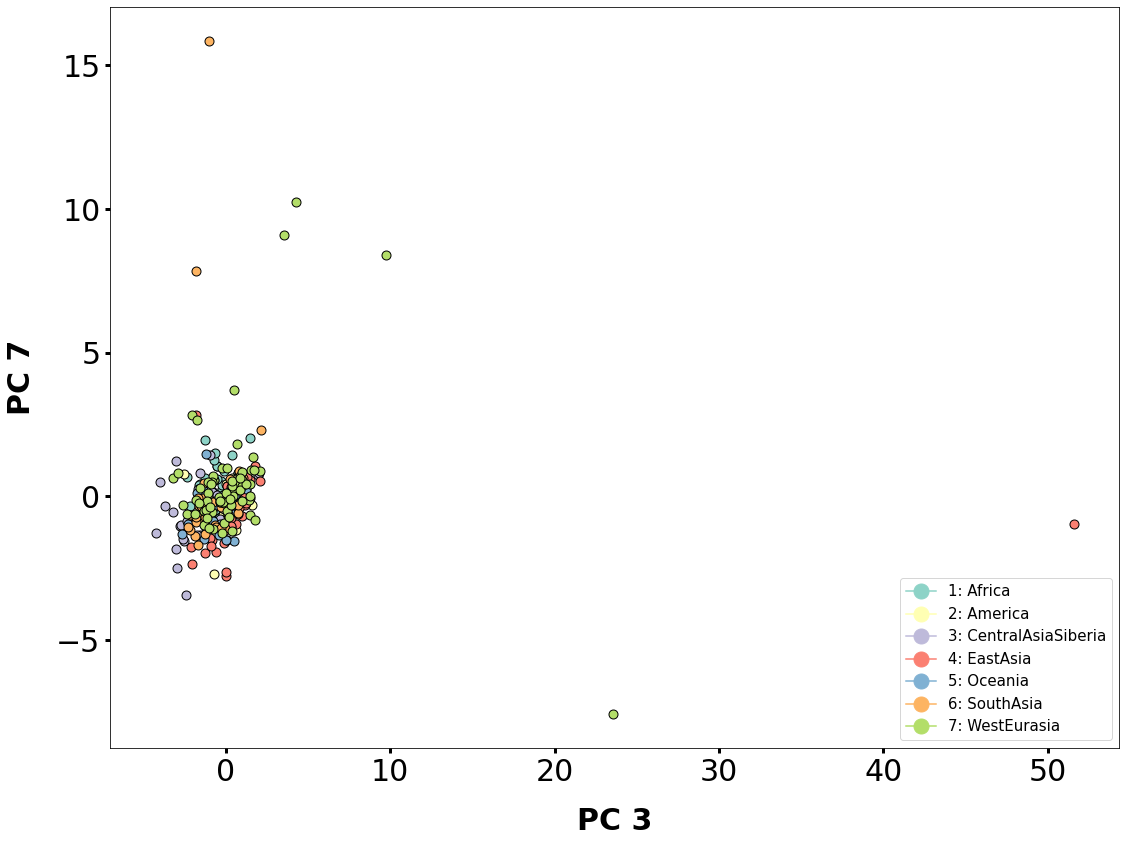

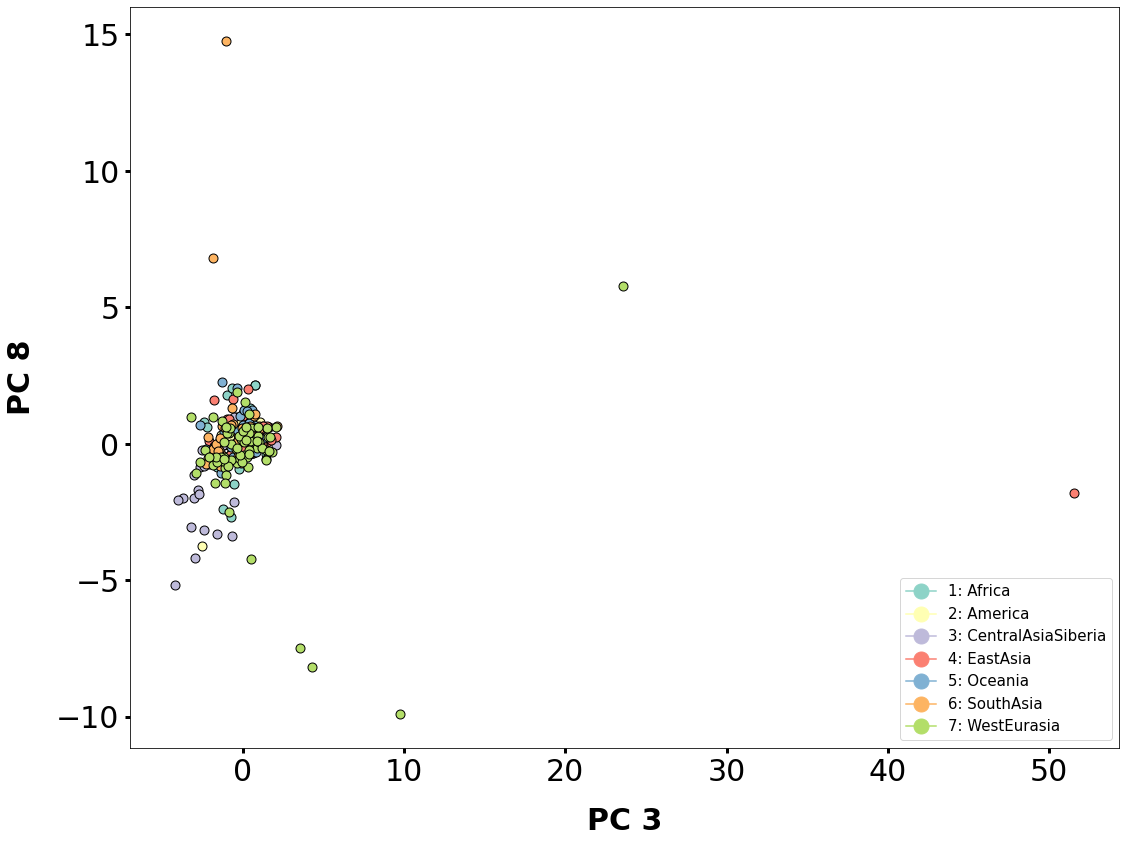

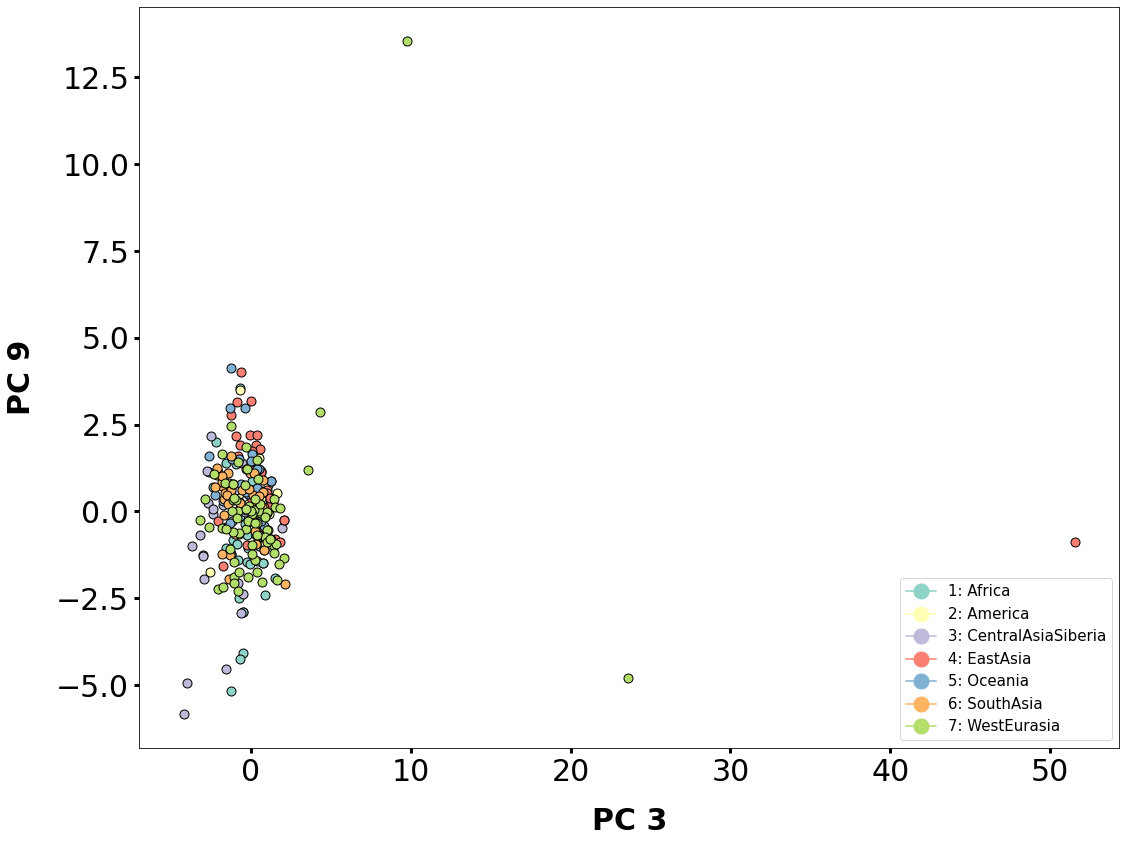

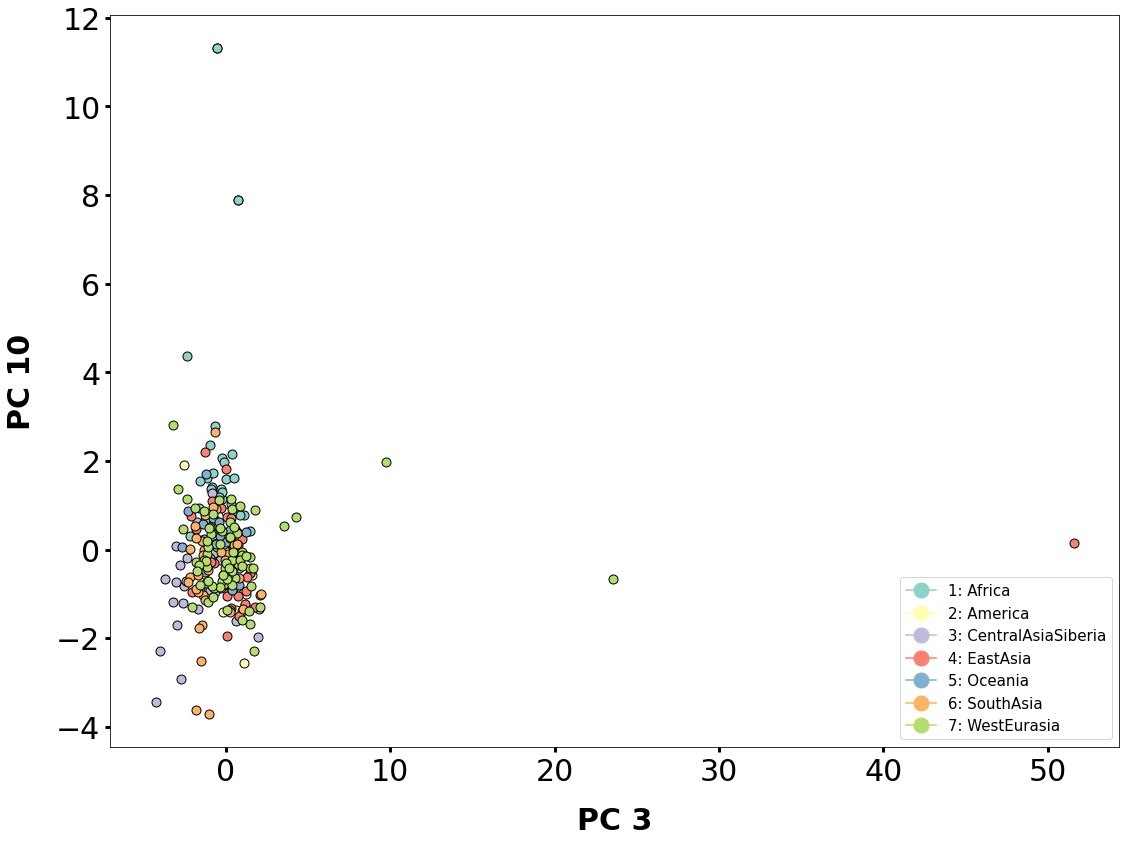

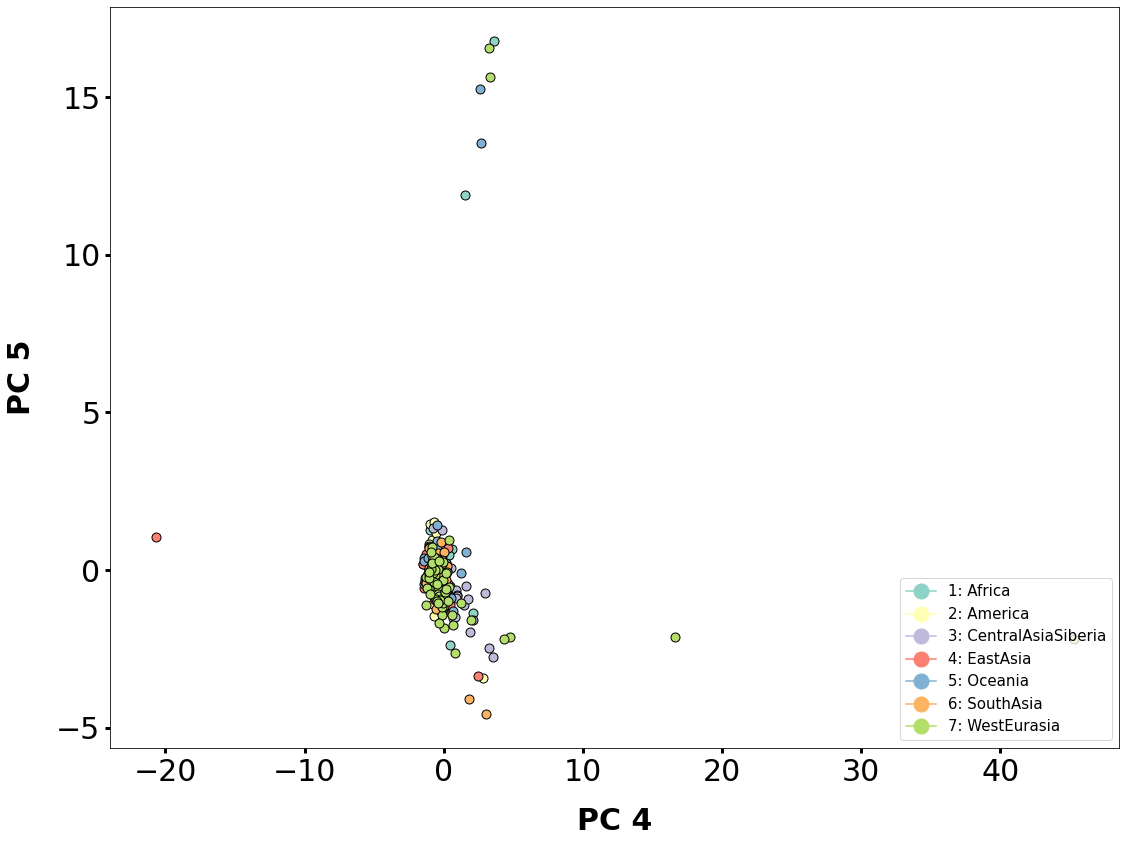

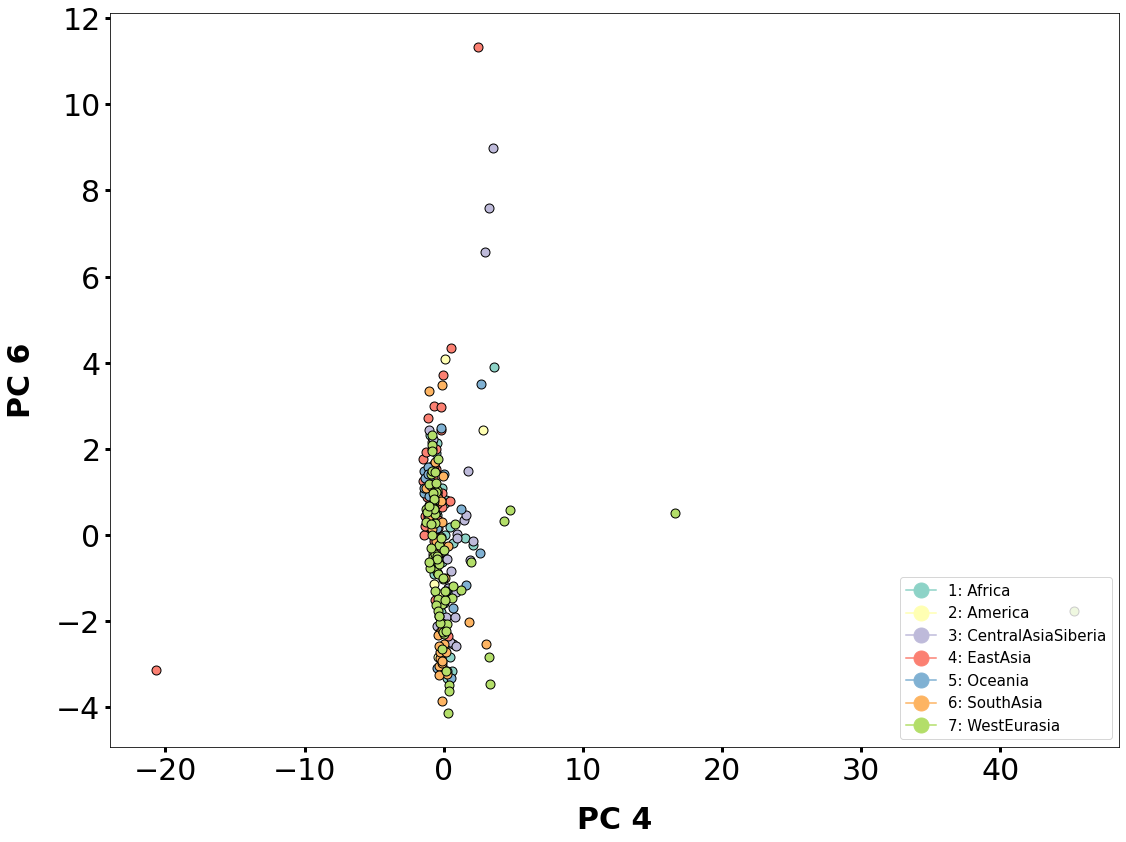

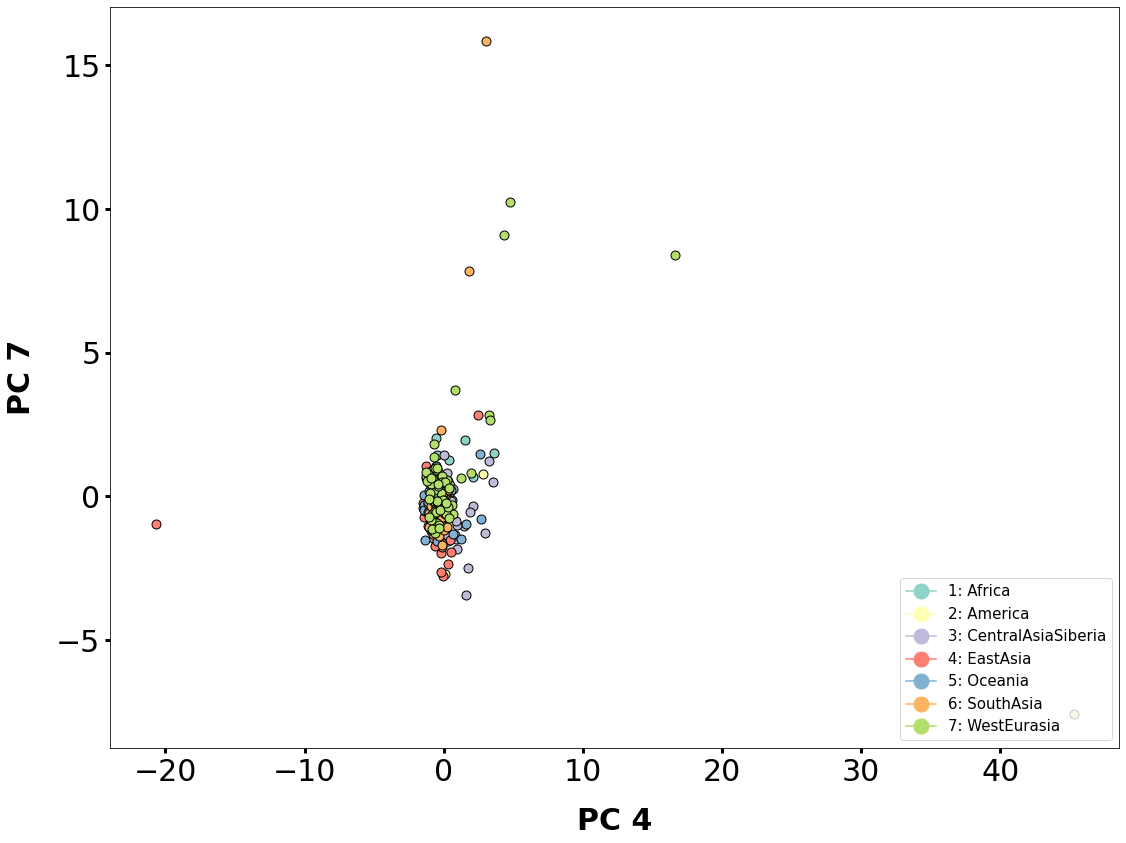

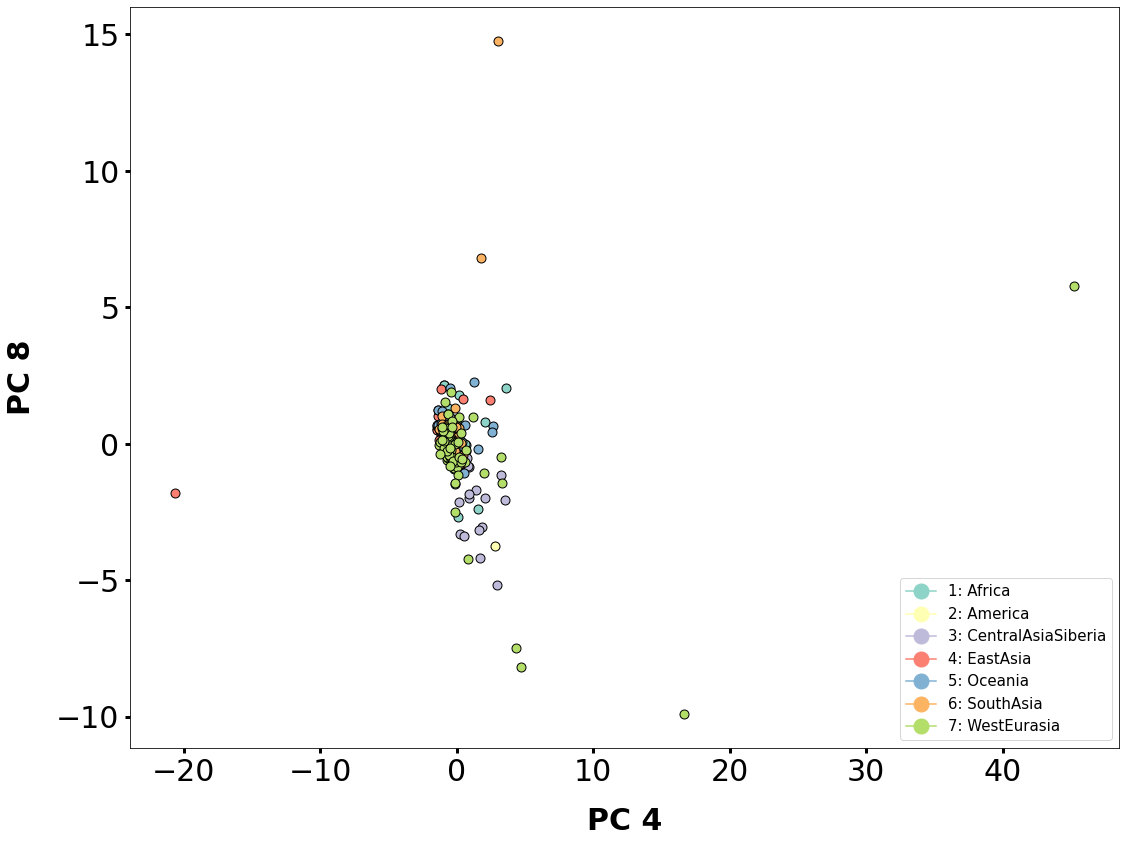

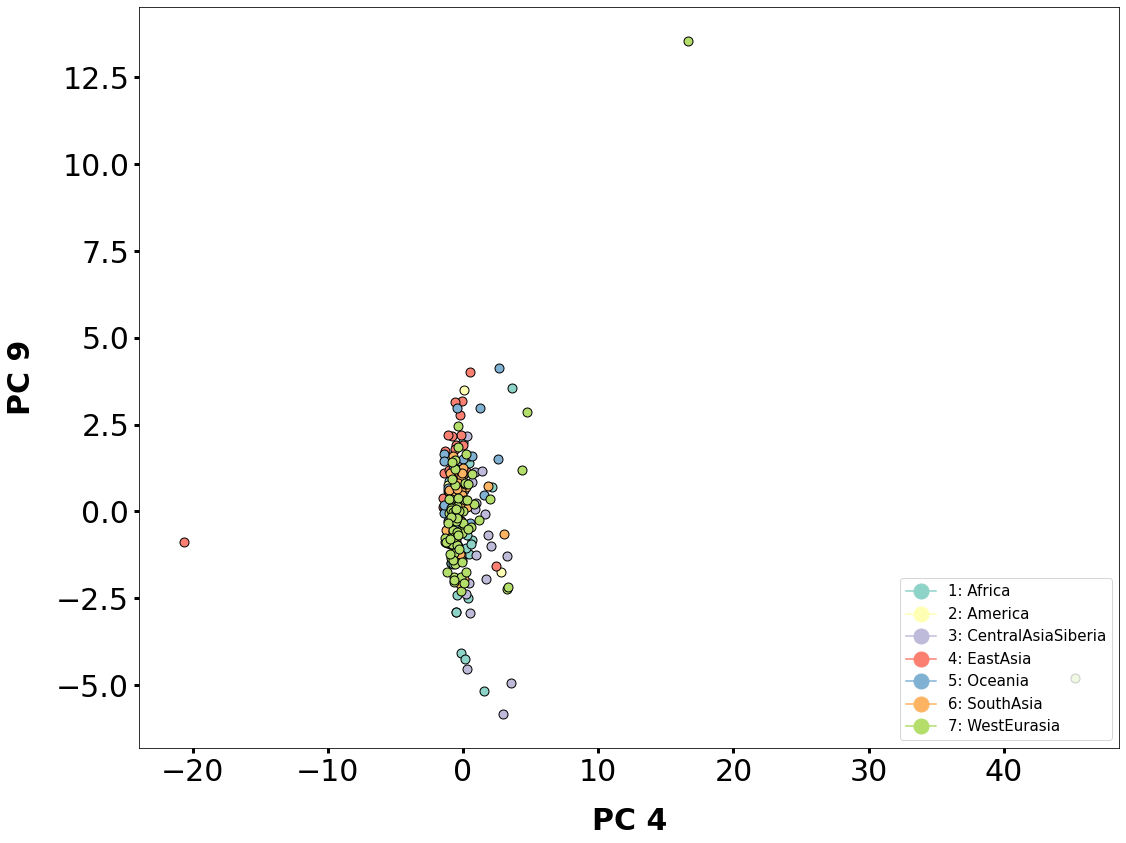

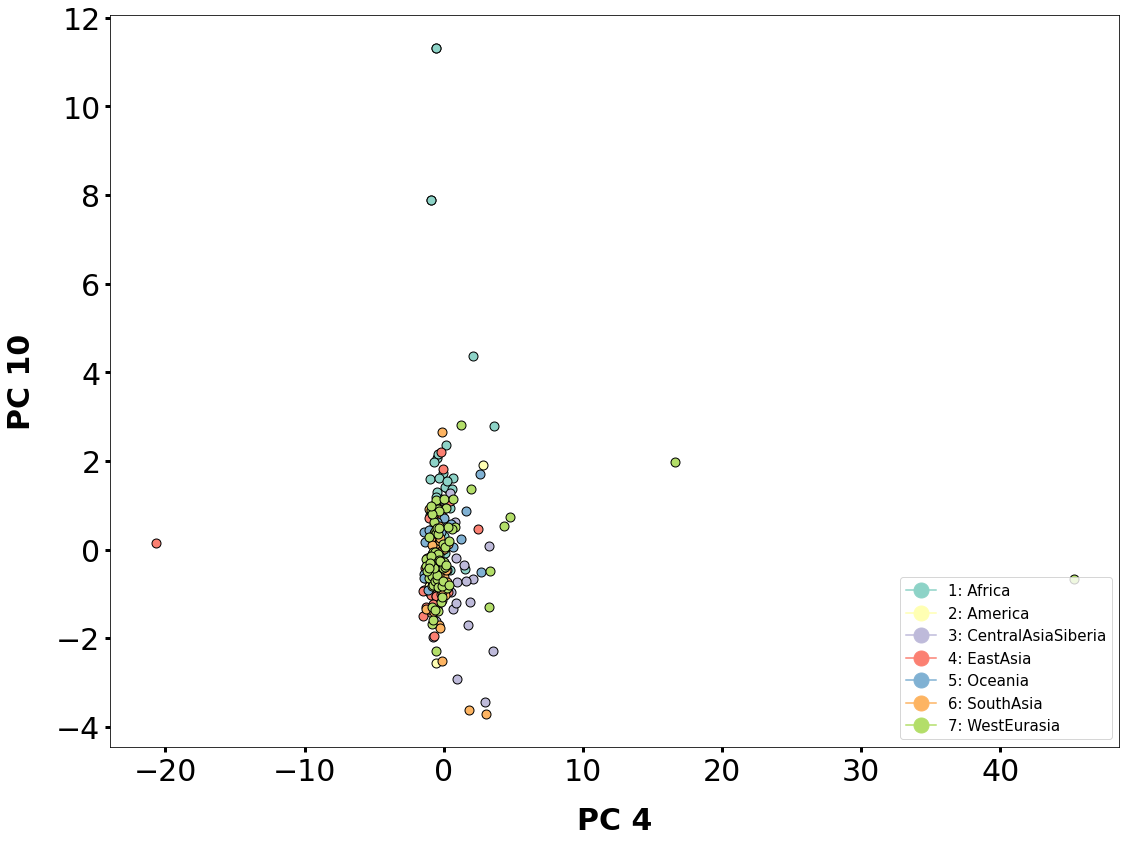

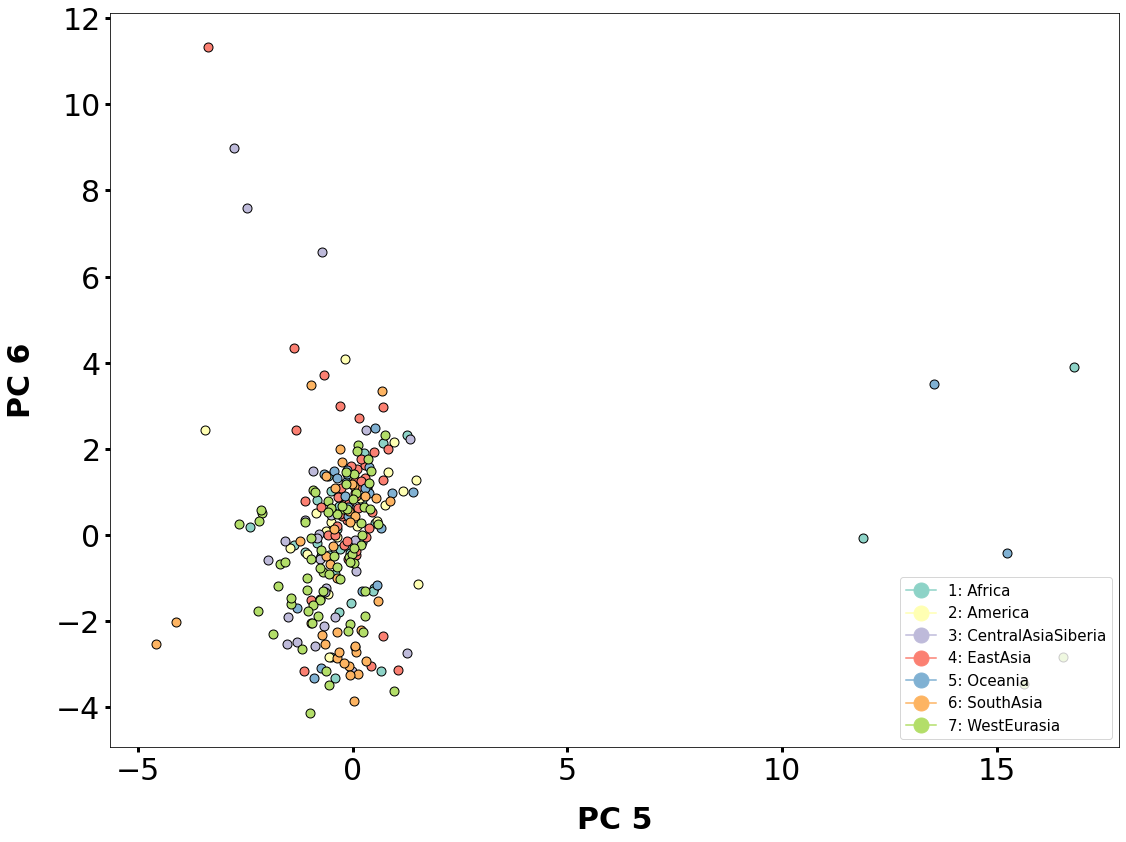

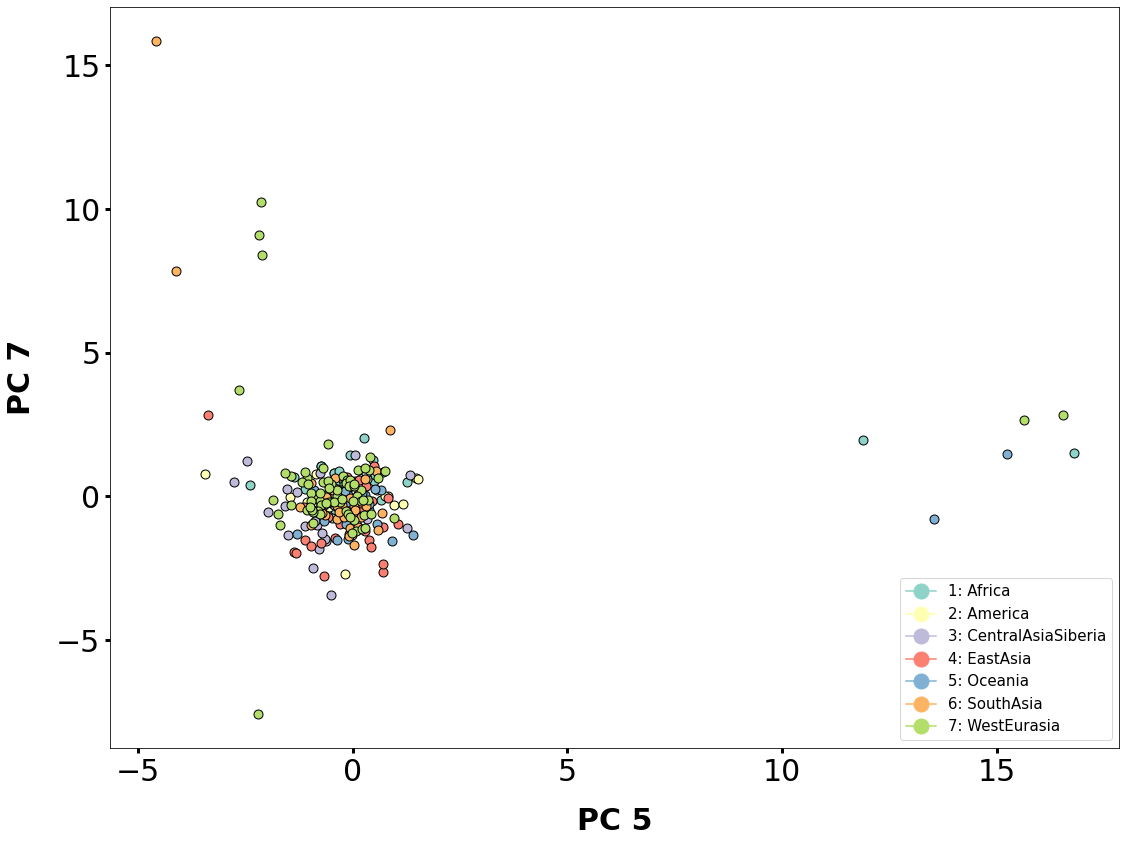

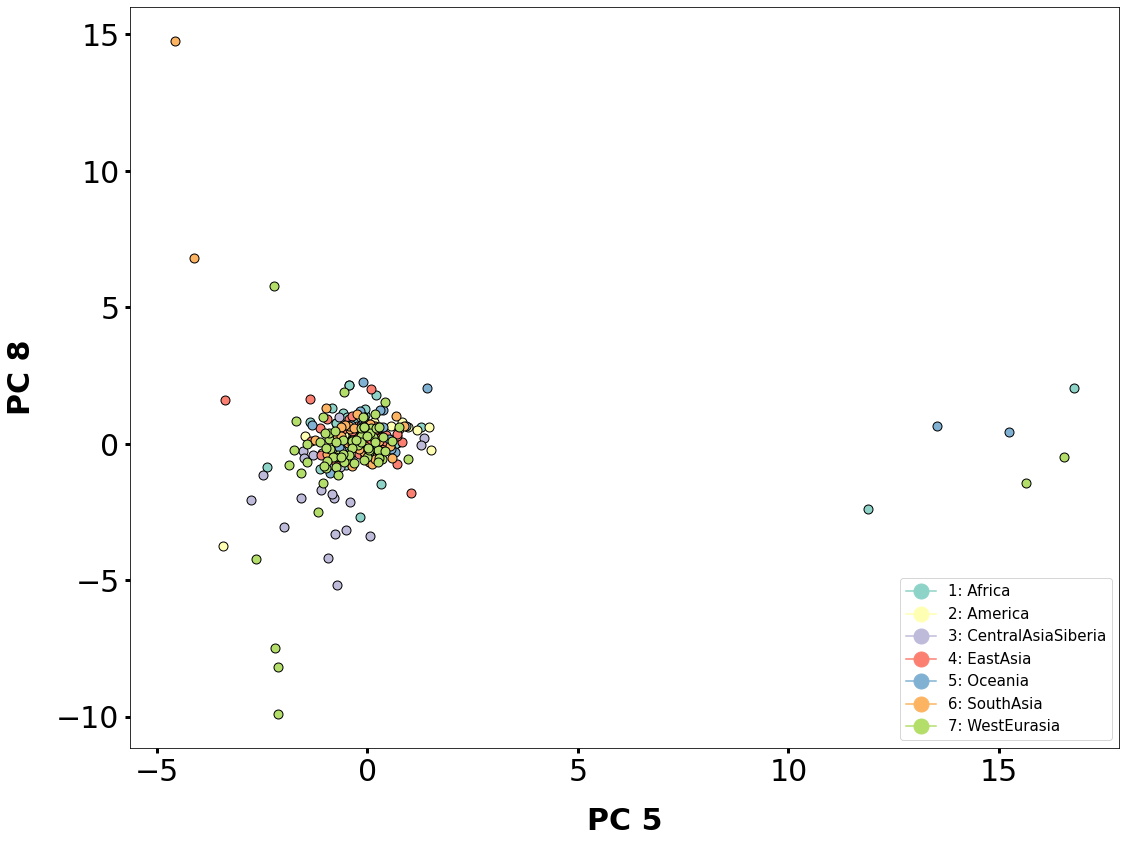

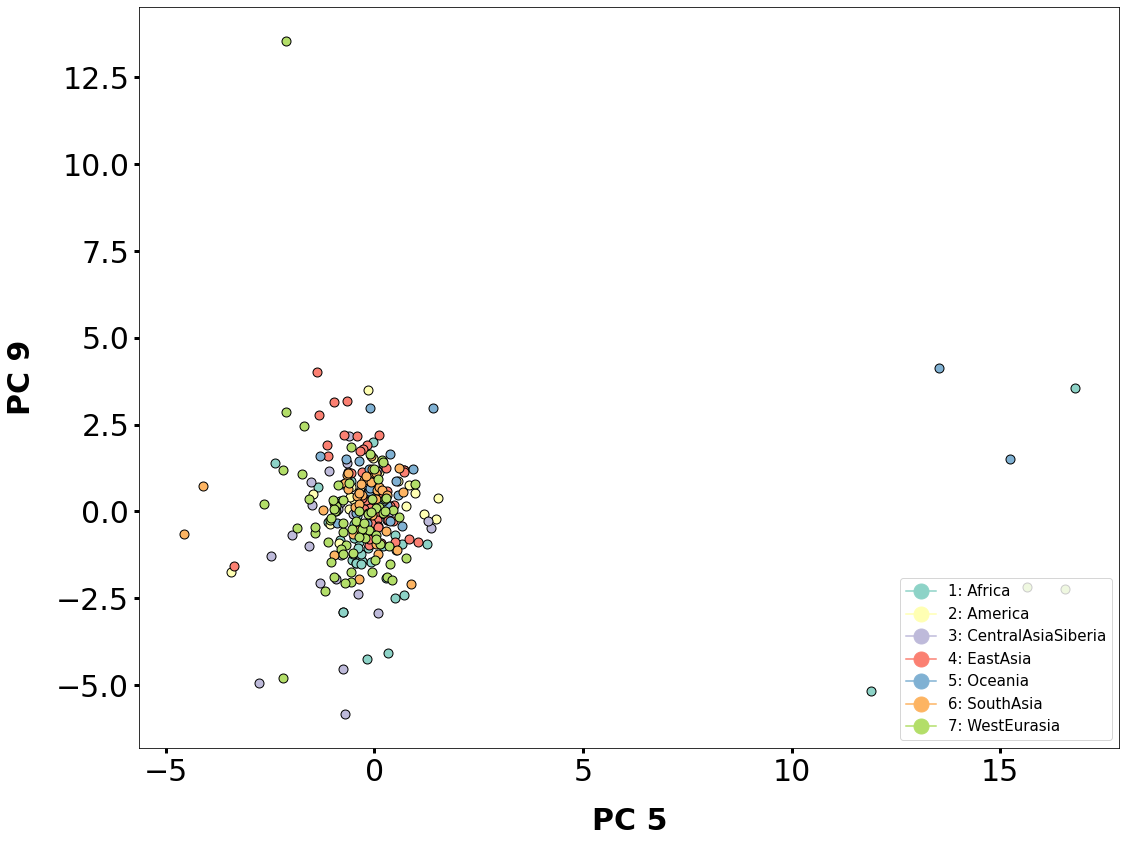

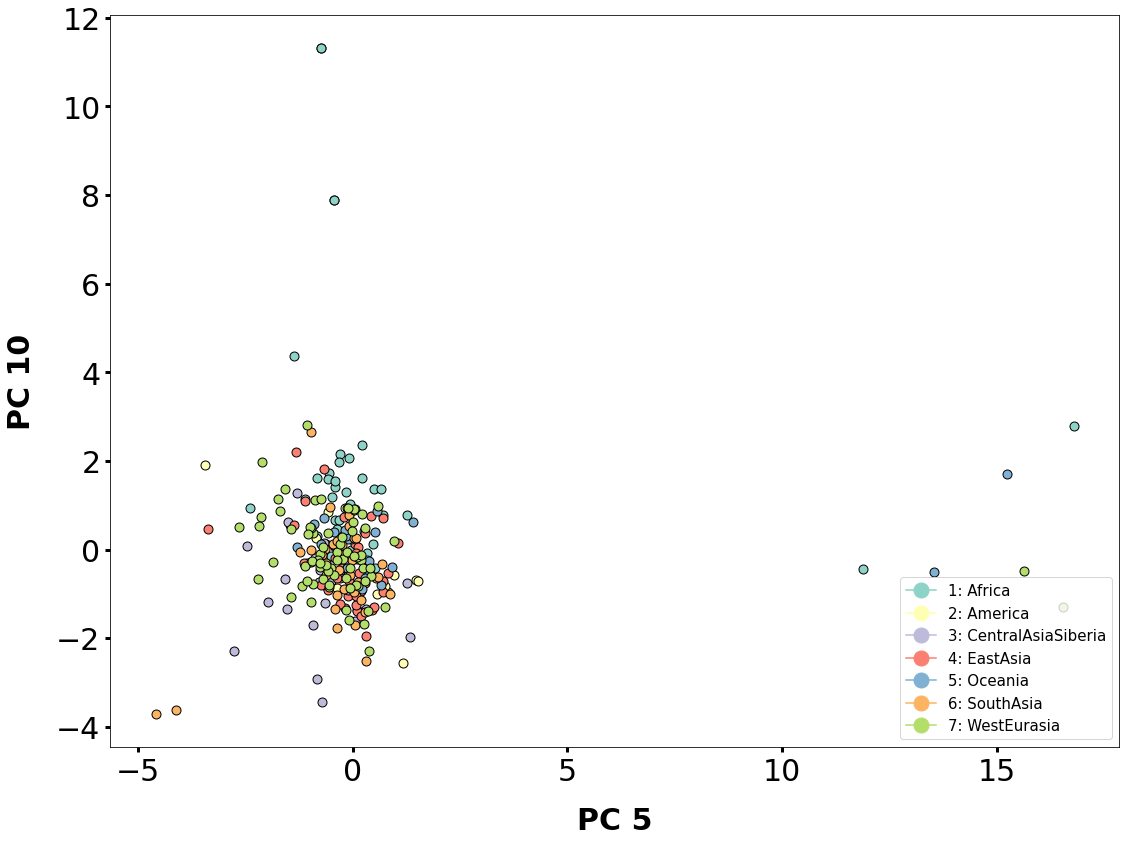

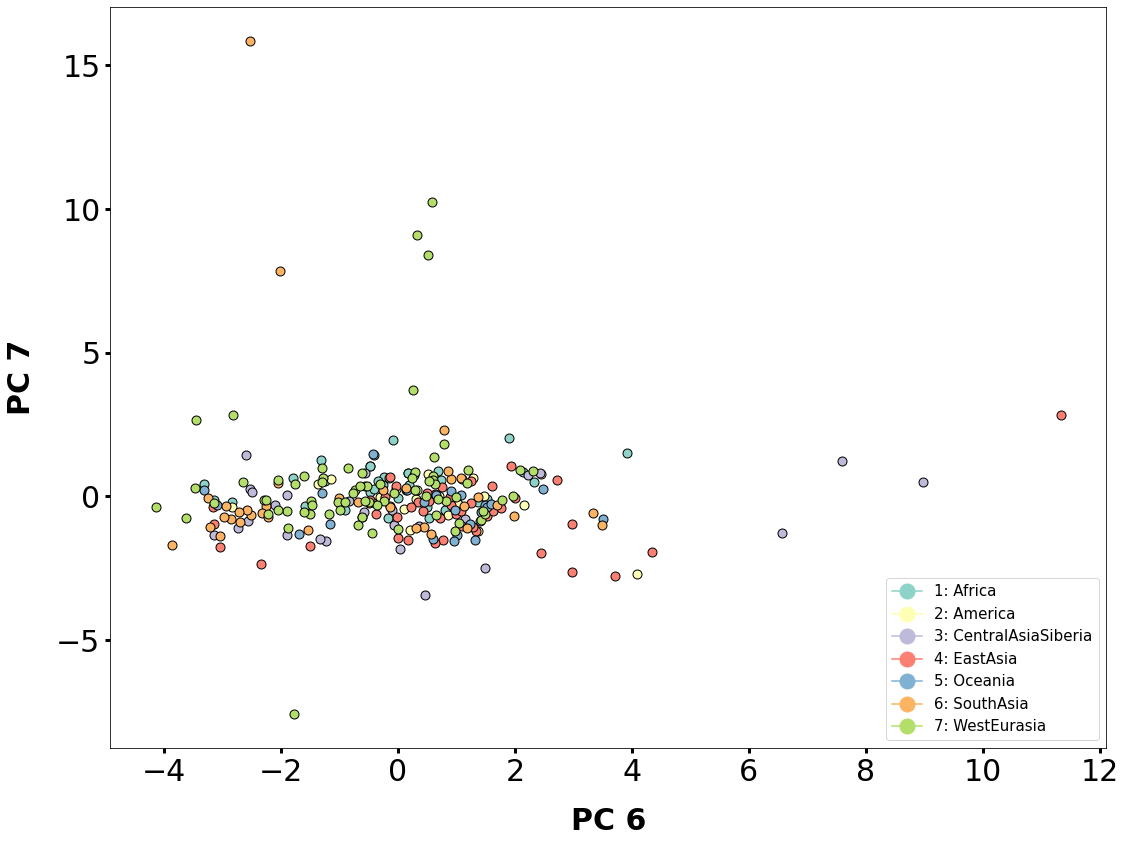

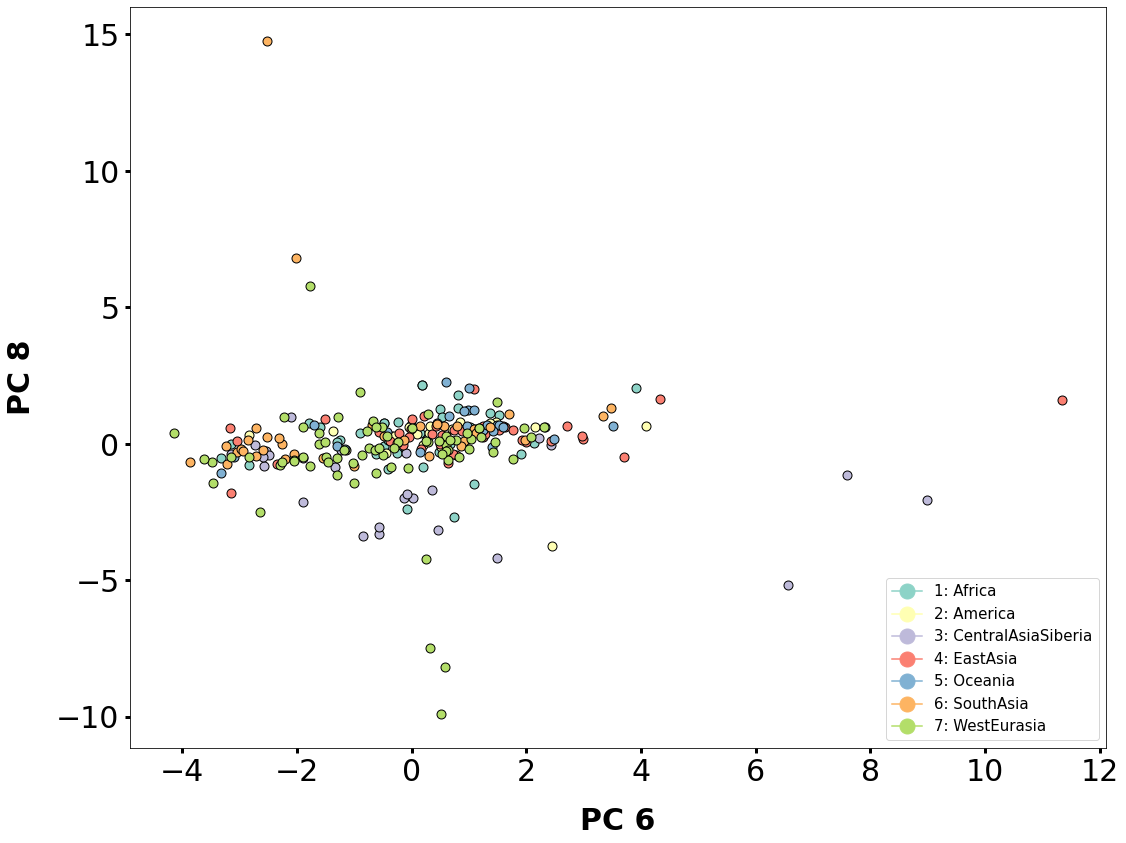

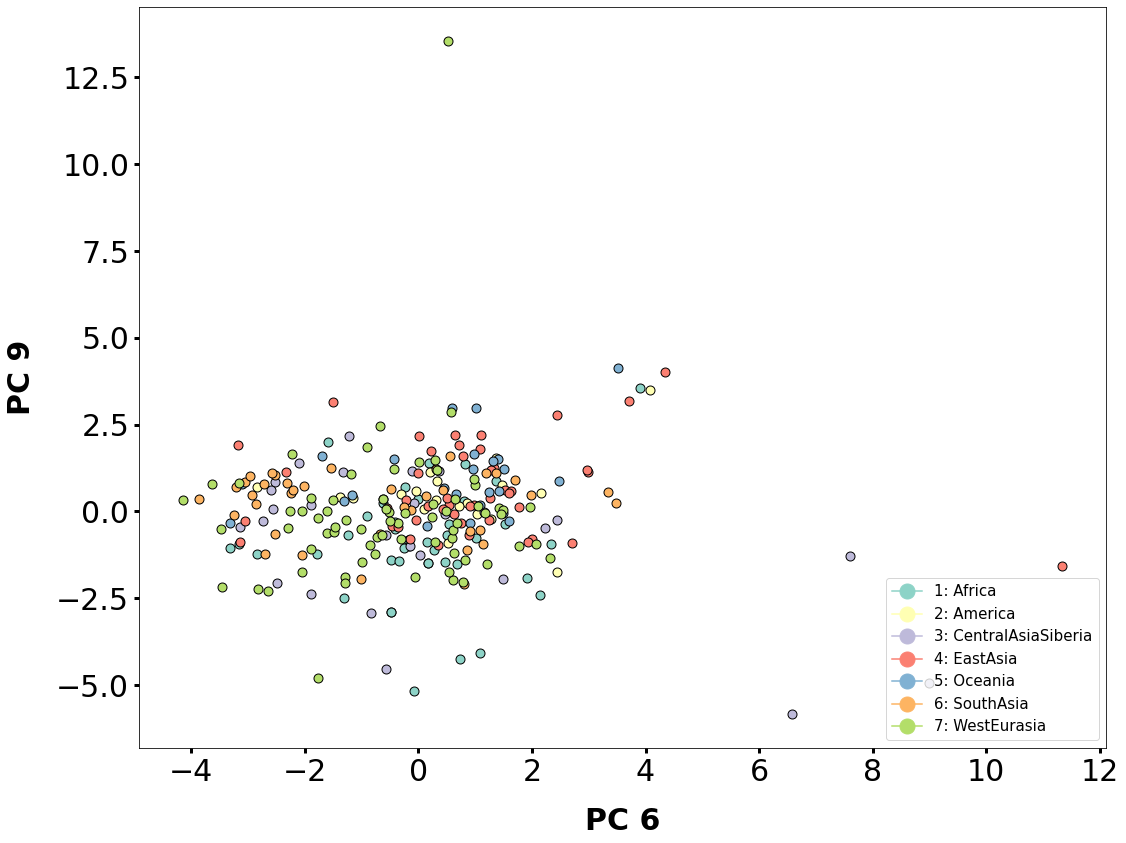

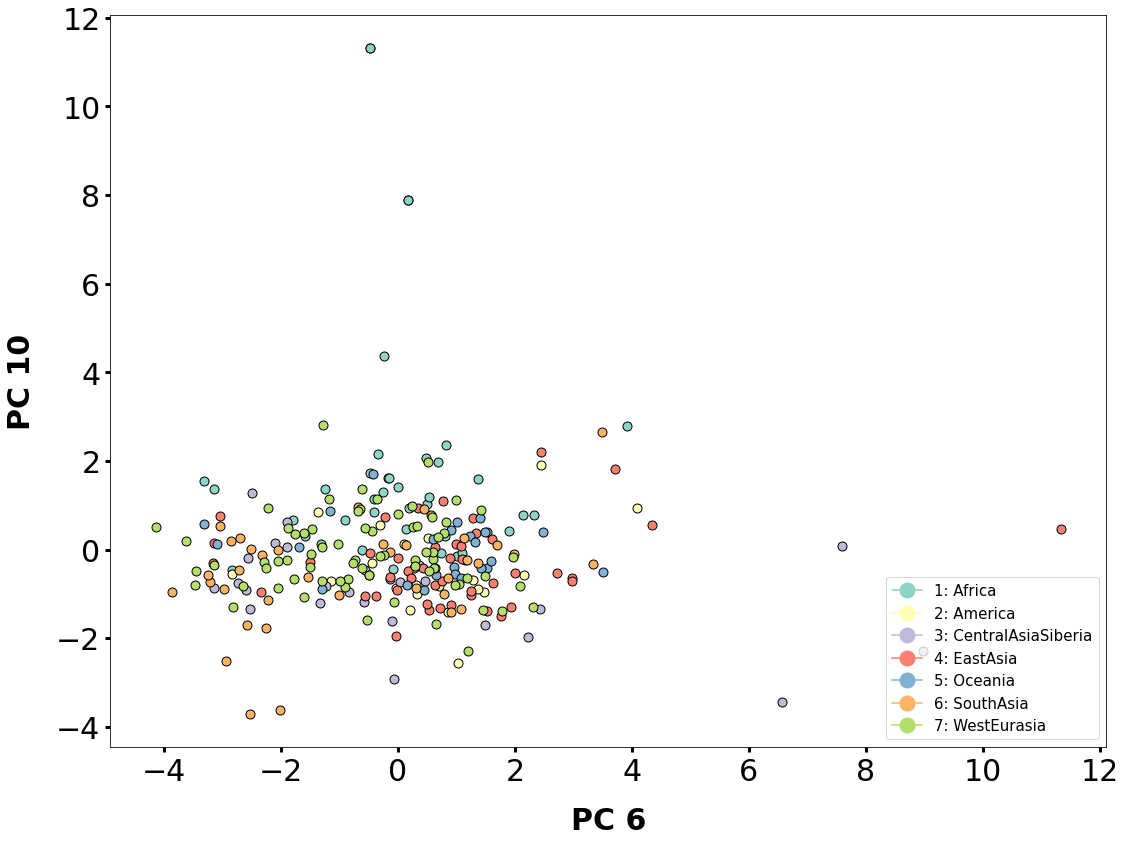

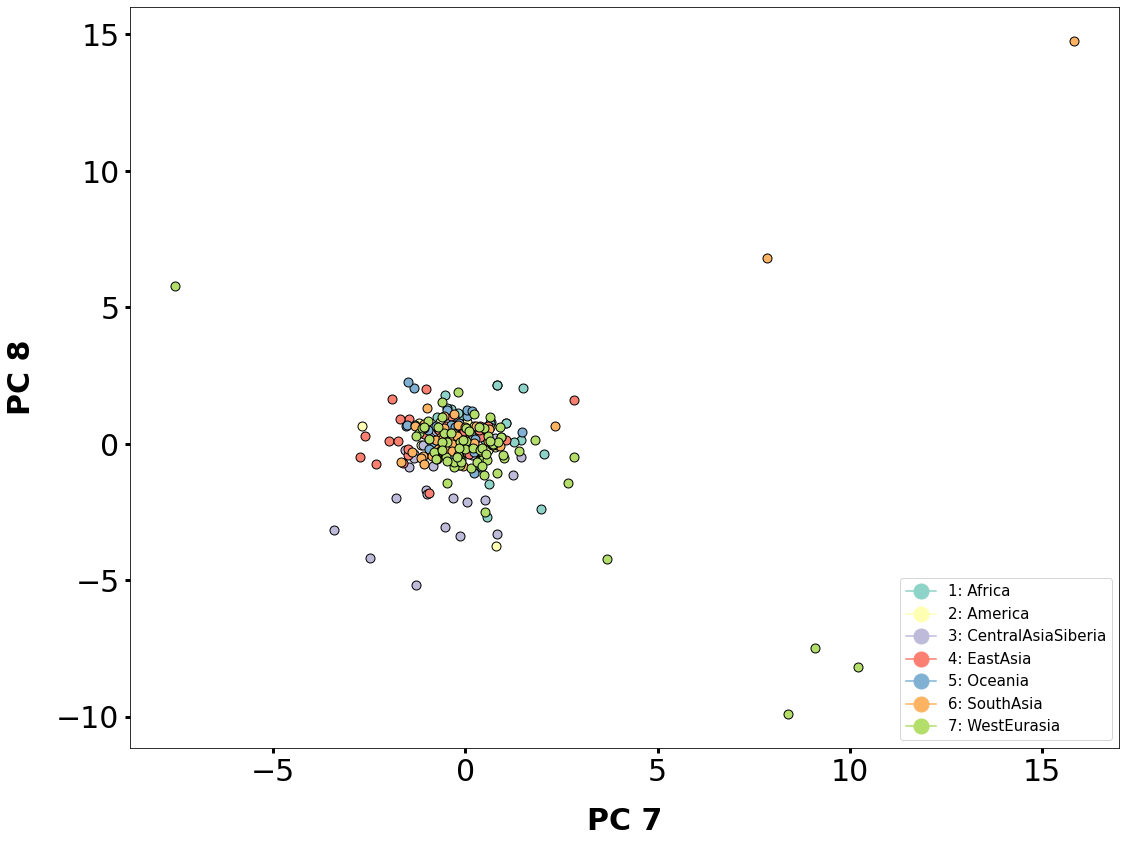

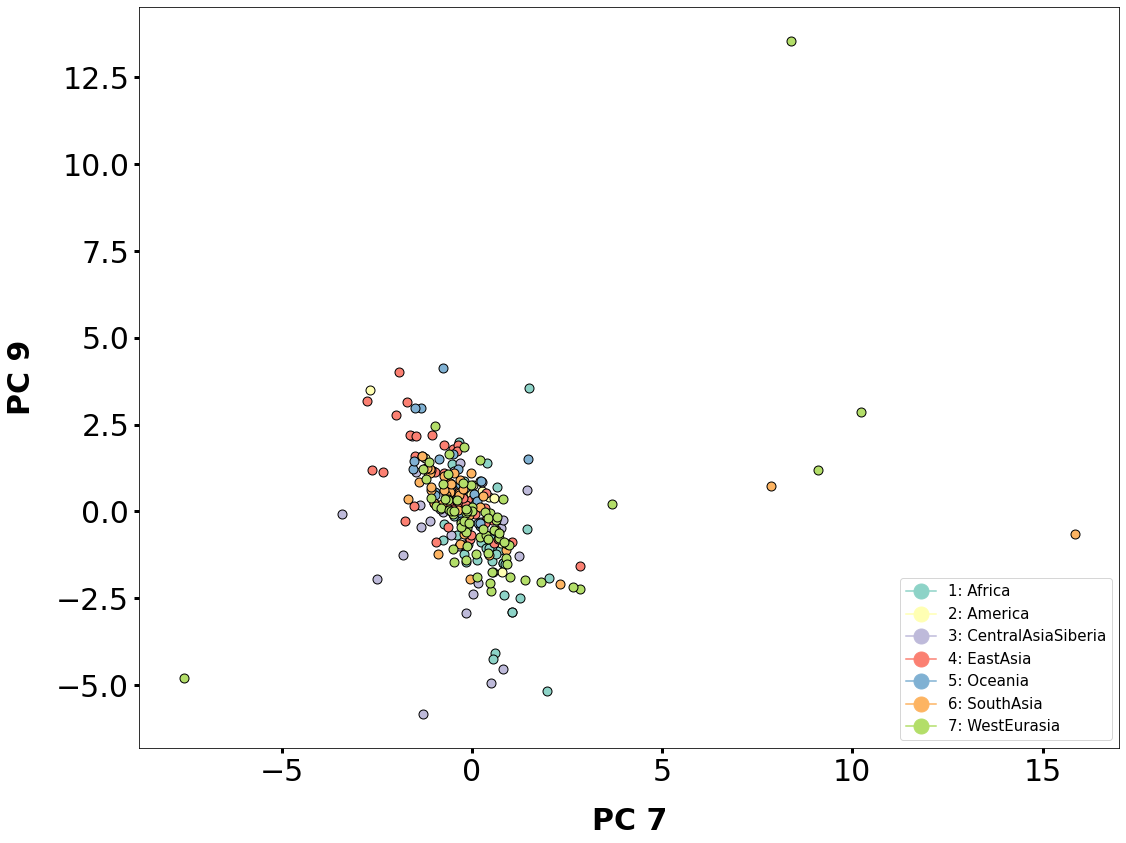

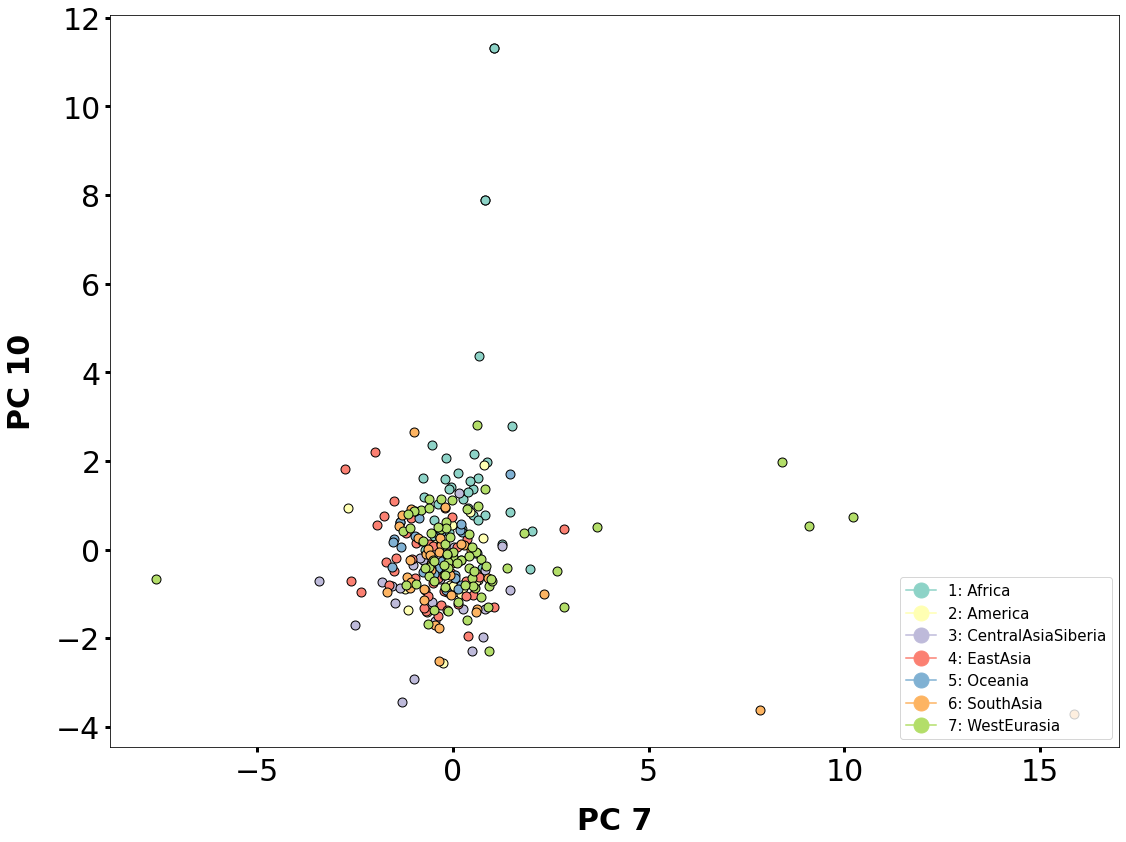

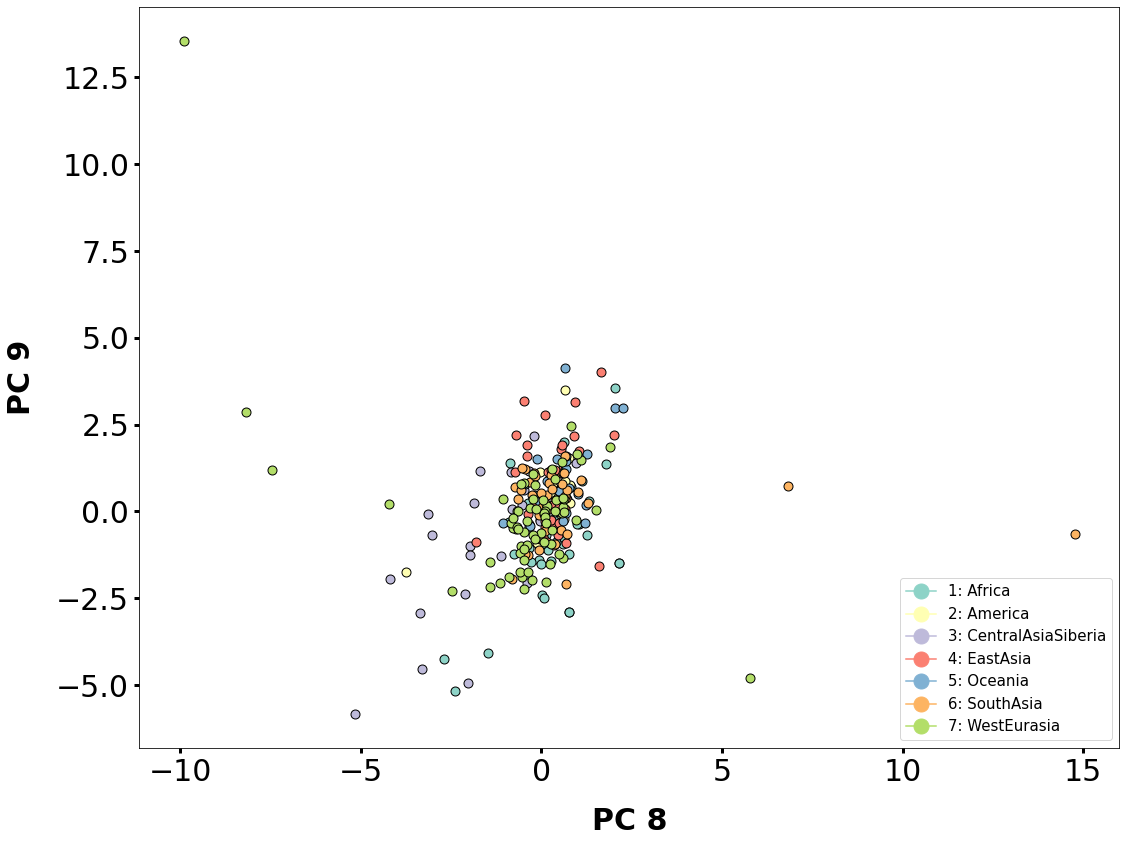

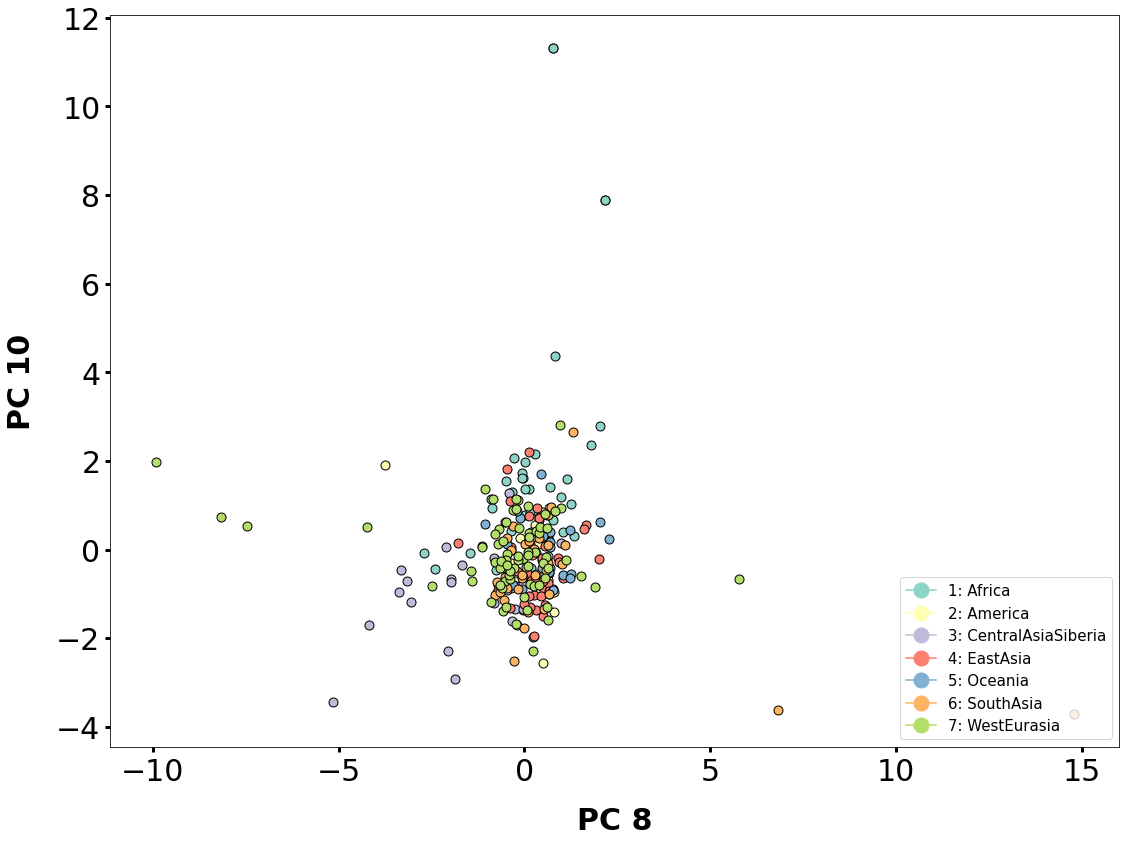

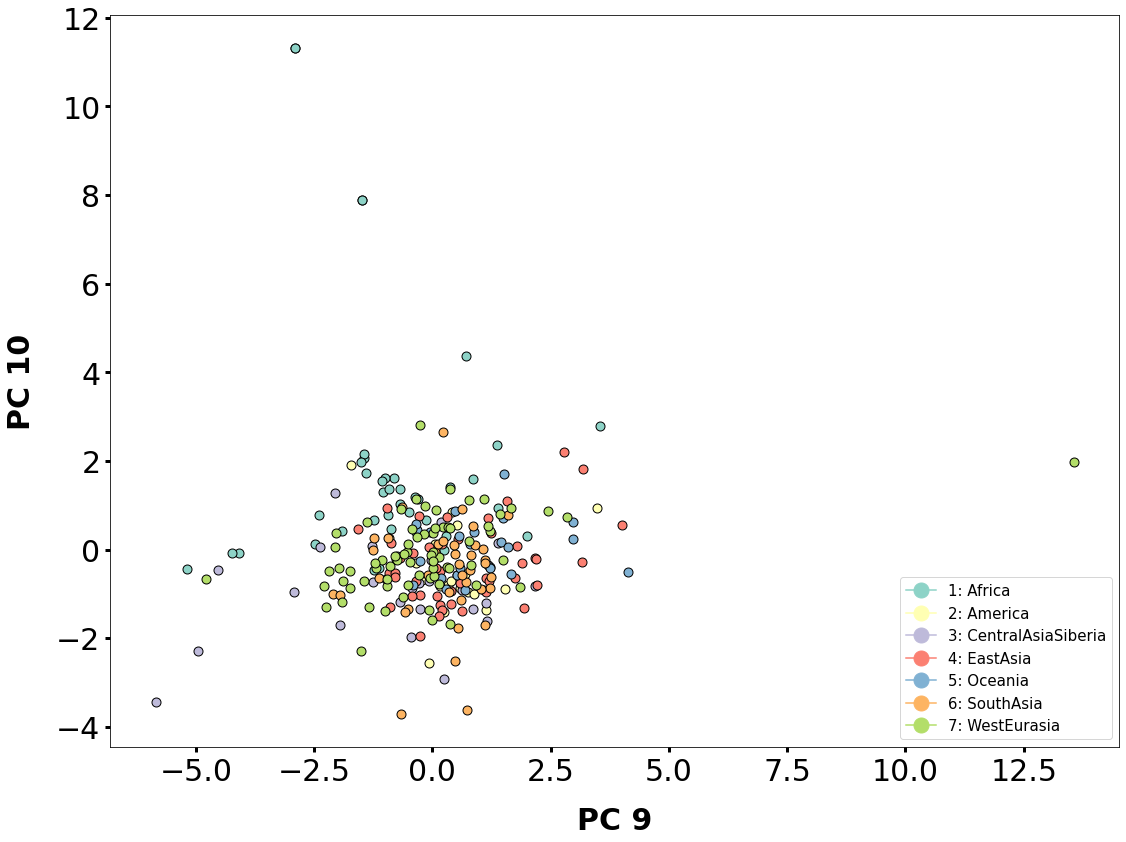

In [25]:
components = [1,2,3,4,5,6,7,8,9,10]

combinations_components = list(combinations(components,2))
for i in combinations_components:
    plot_scatter_cluster(data=df_pca, abscissa='component_'+str(i[0]), ordinate='component_'+str(i[1]), label_horizontal='PC '+ str(i[0]), label_vertical='PC '+str(i[1]), factor='REGION', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
    #print(str(i[0]))
#    plot_scatter_cluster(data=df_pca, abscissa='component_8', ordinate='component_9', label_horizontal='Component 1', label_vertical='Component 3', factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
    

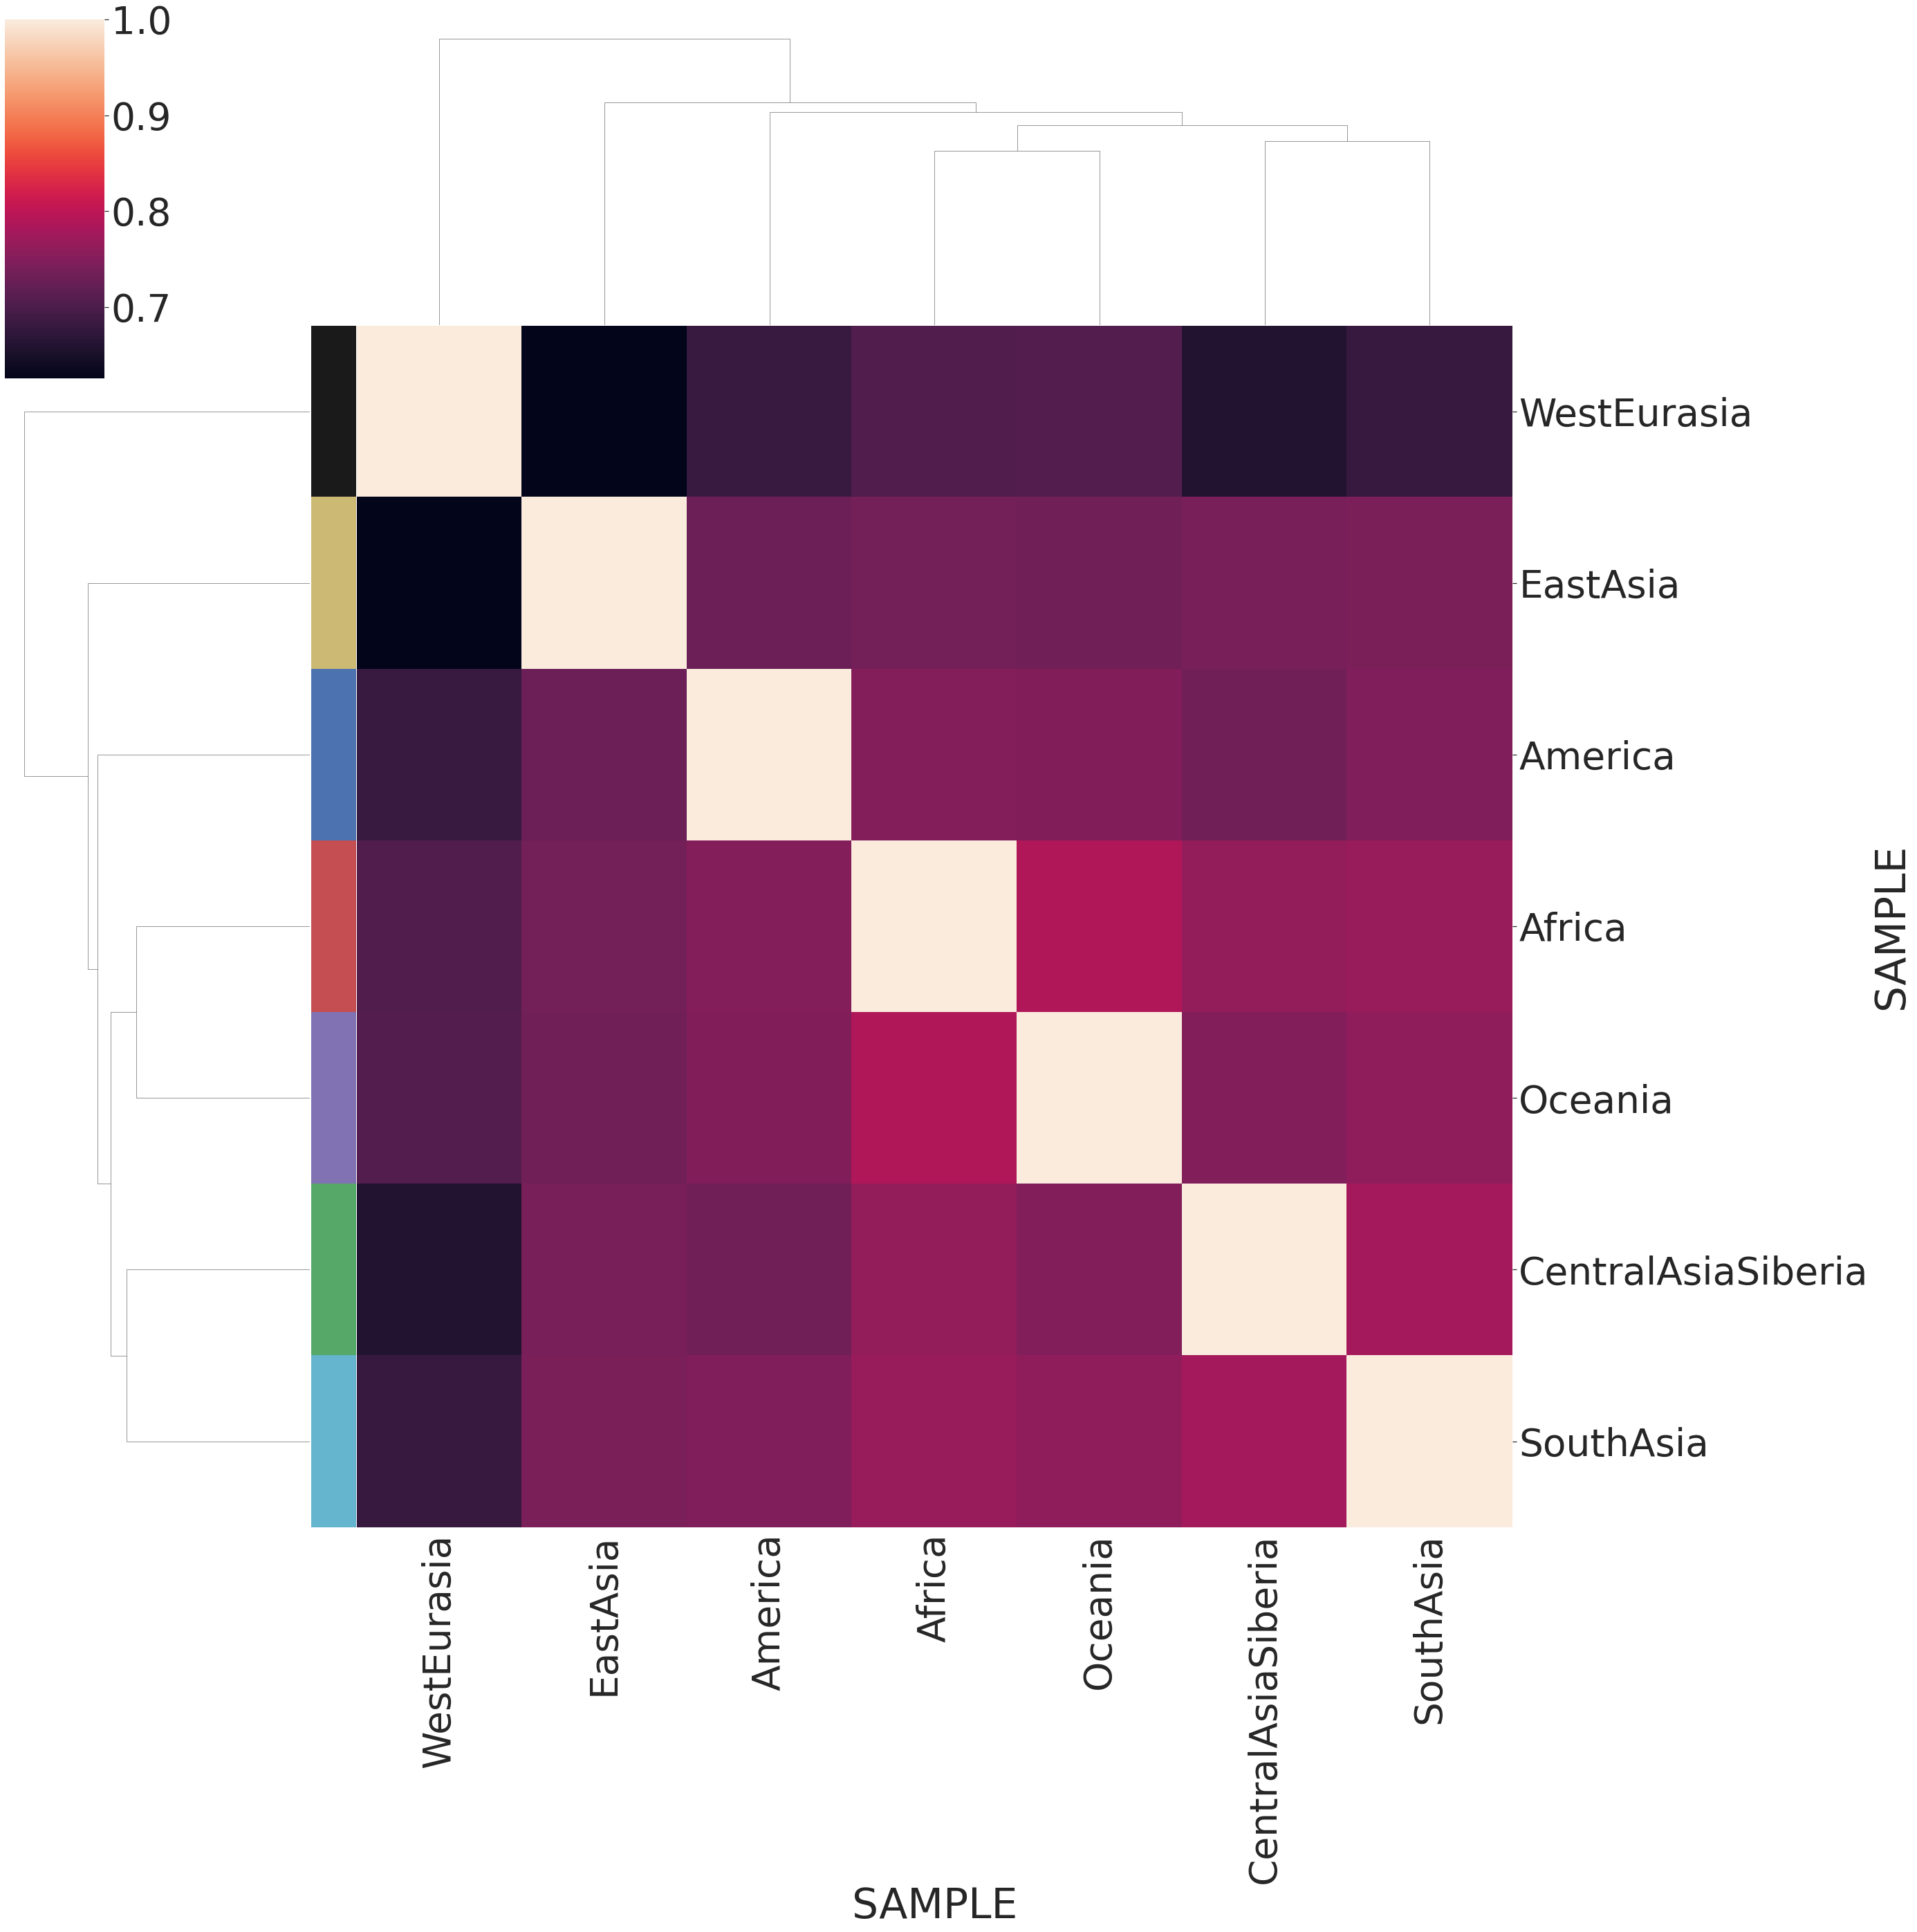

In [185]:
freq = final_cnv.iloc[:,3:283]
freq_input = freq.rename(columns=features['REGION'])
df = freq_input.T
#df = df.reset_index()

#df.groupby('SAMPLE').count().div(df.groupby('SAMPLE').size(),0)


df = df.notnull().groupby(level=0).mean()

df = df.T

lut = dict(zip(df.columns.unique(), "rbgymck"))
lut

seaborn.set(font_scale=5)
corrmatrix = df.corr(method='spearman')
row_colors = df.columns.map(lut)
seaborn.clustermap(corrmatrix, row_colors=row_colors, row_cluster=True, figsize=(40,40))
#plt.savefig('clustermap_regions.pdf')

In [103]:
feature_table = pd.read_table('/branchinecta/jbazanwilliamson/GCF_009914755.1_T2T-CHM13v2.0_feature_table.txt')#, index_col='chromosome')
report = pd.read_table('/branchinecta/jbazanwilliamson/GCF_009914755.1_T2T-CHM13v2.0_assembly_report.txt')

/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [104]:
chm13_gene_anotation = feature_table.merge(report, left_on='genomic_accession', right_on='RefSeq-Accn')
chm13_gene_anotation[chm13_gene_anotation['class'] == 'protein_coding']
chm13_gene_anotation


# feature                   class         assembly     assembly_unit  \
0           gene          protein_coding  GCF_009914755.1  Primary Assembly   
1           mRNA                     NaN  GCF_009914755.1  Primary Assembly   
2            CDS            with_protein  GCF_009914755.1  Primary Assembly   
3           gene                  lncRNA  GCF_009914755.1  Primary Assembly   
4          ncRNA                  lncRNA  GCF_009914755.1  Primary Assembly   
...          ...                     ...              ...               ...   
236307      gene          protein_coding  GCF_009914755.1  Primary Assembly   
236308      mRNA                     NaN  GCF_009914755.1  Primary Assembly   
236309       CDS            with_protein  GCF_009914755.1  Primary Assembly   
236310      gene  transcribed_pseudogene  GCF_009914755.1  Primary Assembly   
236311  misc_RNA                     NaN  GCF_009914755.1  Primary Assembly   

          seq_type chromosome genomic_accession     start       end strand  \
0       chromosome          1       NC_060925.1     11134     37628      -   
1       chromosome          1       NC_060925.1     11134     37628      -   
2       chromosome          1       NC_060925.1     13463     37628      -   
3       chromosome          1       NC_060925.1     20892     23710      -   
4       chromosome          1       NC_060925.1     20892     23710      -   
...            ...        ...               ...       ...       ...    ...   
236307  chromosome          Y       NC_060948.1  62446549  62449392      +   
236308  chromosome          Y       NC_060948.1  62446549  62449392      +   
236309  chromosome          Y       NC_060948.1  62446549  62449100      +   
236310  chromosome          Y       NC_060948.1  62449384  62451910      -   
236311  chromosome          Y       NC_060948.1  62449384  62451910      -   

        ... Sequence-Name       Sequence-Role Assigned-Molecule  \
0       ...             1  assembled-molecule                 1   
1       ...             1  assembled-molecule                 1   
2       ...             1  assembled-molecule                 1   
3       ...             1  assembled-molecule                 1   
4       ...             1  assembled-molecule                 1   
...     ...           ...                 ...               ...   
236307  ...             Y  assembled-molecule                 Y   
236308  ...             Y  assembled-molecule                 Y   
236309  ...             Y  assembled-molecule                 Y   
236310  ...             Y  assembled-molecule                 Y   
236311  ...             Y  assembled-molecule                 Y   

       Assigned-Molecule-Location/Type GenBank-Accn  Relationship  \
0                           Chromosome   CP068277.2             =   
1                           Chromosome   CP068277.2             =   
2                           Chromosome   CP068277.2             =   
3                           Chromosome   CP068277.2             =   
4                           Chromosome   CP068277.2             =   
...                                ...          ...           ...   
236307                      Chromosome   CP086569.2             =   
236308                      Chromosome   CP086569.2             =   
236309                      Chromosome   CP086569.2             =   
236310                      Chromosome   CP086569.2             =   
236311                      Chromosome   CP086569.2             =   

        RefSeq-Accn     Assembly-Unit  Sequence-Length UCSC-style-name  
0       NC_060925.1  Primary Assembly        248387328              na  
1       NC_060925.1  Primary Assembly        248387328              na  
2       NC_060925.1  Primary Assembly        248387328              na  
3       NC_060925.1  Primary Assembly        248387328              na  
4       NC_060925.1  Primary Assembly        248387328              na  
...             ...               ...            

<h1> Phylo

In [105]:
from Bio.Phylo.TreeConstruction import _Matrix
from Bio.Phylo.TreeConstruction import DistanceMatrix
from scipy.spatial.distance import pdist, squareform
import scipy.stats

a = scipy.stats.zscore(counts, axis=1)
distances = pdist(np.array(a), metric='euclidean')
dist_matrix = squareform(distances)
dist_matrix.shape

dist_matrix

name =  list(counts.index)
matrix = dist_matrix
dist_matrix

array([[  0.        ,  96.89063893,  96.55651571, ..., 100.50869399,
        102.50255926, 104.39974369],
       [ 96.89063893,   0.        ,  95.86550548, ...,  98.97166458,
        100.61316597, 104.29050962],
       [ 96.55651571,  95.86550548,   0.        , ..., 102.73980552,
        102.11184038, 105.04967291],
       ...,
       [100.50869399,  98.97166458, 102.73980552, ...,   0.        ,
         86.53511859,  93.08621507],
       [102.50255926, 100.61316597, 102.11184038, ...,  86.53511859,
          0.        ,  90.33165732],
       [104.39974369, 104.29050962, 105.04967291, ...,  93.08621507,
         90.33165732,   0.        ]])

In [106]:
lut = dict(zip(features['REGION'].unique(), "rbgymck"))

row_colors = features['REGION'].map(lut)
row_color = row_colors.to_dict()
lut

features

REGION           COUNTRY
SAMPLE                                          
LP6005441-DNA_A01  WestEurasia  Russia(Caucasus)
LP6005441-DNA_A03      Oceania    PapuaNewGuinea
LP6005441-DNA_A04      America          Colombia
LP6005441-DNA_A05  WestEurasia            France
LP6005441-DNA_A06  WestEurasia    Italy(Bergamo)
...                        ...               ...
LP6007069-DNA_A01  WestEurasia            Greece
SS6004471               Africa             Congo
SS6004477              Oceania         Australia
SS6004478              Oceania         Australia
SS6004480               Africa             Sudan

[269 rows x 2 columns]

In [107]:
from biotite.sequence.phylo import neighbor_joining
#track features for pca & tsne
#features = features.sort_index()

#names.get_indices()
labels = list(counts.index)
#labels = list(features['10-Region'])
tree = biotite.sequence.phylo.neighbor_joining(dist_matrix)
t = print(tree.to_newick(labels=labels, include_distance=True))


#with open('newick_tree.tree', 'a') as f:
#    f.write(t)


((((((((LP6005677-DNA_E01:46.194732666015625,LP6005443-DNA_C07:45.723480224609375):0.9044163227081299,(LP6005443-DNA_G01:45.72200393676758,LP6005443-DNA_B07:46.050968170166016):1.5173861980438232):0.11287937313318253,(LP6005443-DNA_F01:45.90475845336914,LP6005441-DNA_F09:46.56496810913086):1.0421823263168335):0.2646827697753906,(LP6005443-DNA_E07:44.7030143737793,LP6005441-DNA_B05:47.03042221069336):0.9659185409545898):0.3582175374031067,((LP6005441-DNA_H12:47.91288375854492,LP6005441-DNA_G06:46.2773551940918):0.21844933927059174,(LP6005441-DNA_D07:45.858673095703125,LP6005441-DNA_C03:48.23528289794922):0.8131363391876221):0.36242884397506714):0.19881245493888855,((((LP6005592-DNA_G01:45.82413101196289,LP6005441-DNA_C09:46.12510299682617):0.5862827301025391,(((LP6005592-DNA_D03:45.2372932434082,LP6005441-DNA_E10:45.78836441040039):0.45333364605903625,LP6005443-DNA_C02:46.41712951660156):0.634305477142334,(((LP6005443-DNA_D01:47.84109878540039,LP6005441-DNA_A06:43.417850494384766):0.806

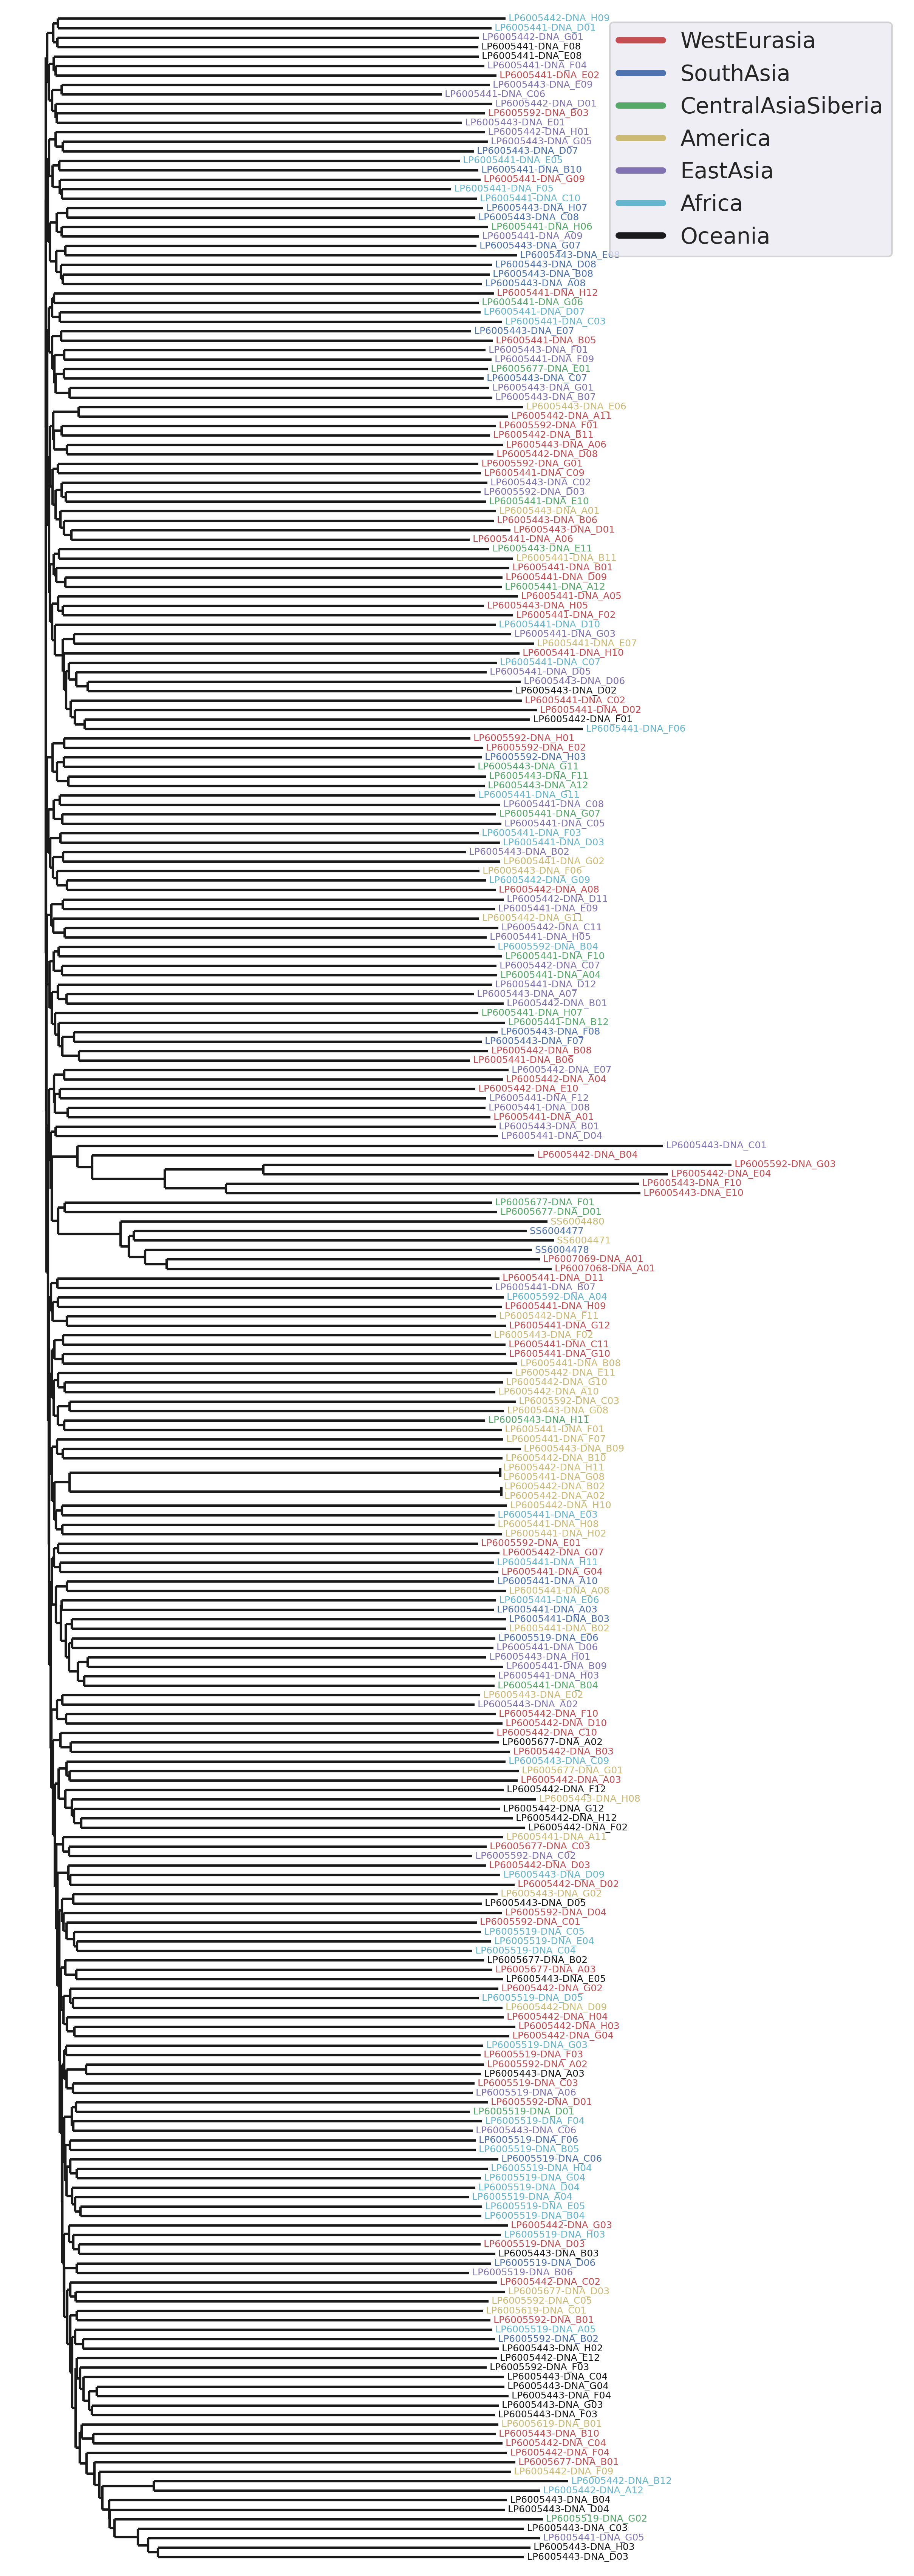

In [108]:
from Bio import Phylo
from io import StringIO 
import pylab
from matplotlib.lines import Line2D

handle = StringIO(str(tree.to_newick(labels=labels, include_distance=True)))
tree_2 = Phylo.read(handle, "newick")
tree_2.ladderize()

matplotlib.rc('font', size=6)
    # set the size of the figure
fig = plt.figure(figsize=(10, 70), dpi=300)
    # alternatively
    # fig.set_size_inches(10, 40)
axes = fig.add_subplot(3, 1, 1)
fig.tight_layout()
Phylo.draw(tree_2, 
           axes=axes, 
           do_show=False,
           label_colors= row_color)
pylab.axis('off')

### CUSTOM LEGEND
custom_lines = [Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='y', lw=4),
                Line2D([0], [0], color='m', lw=4),
                Line2D([0], [0], color='c', lw=4),
                Line2D([0], [0], color='k', lw=4)]

#fig, ax = plt.subplots()
plt.legend(custom_lines, ['WestEurasia', 'SouthAsia', 'CentralAsiaSiberia', 'America', 'EastAsia', 'Africa','Oceania'],  loc =0, prop={'size': 14})

#plt.savefig('neighbor-joining-tree_euclidean.png')

In [109]:
from biotite.sequence.phylo import upgma

#features = features.sort_index()

#names.get_indices()
labels = list(counts.index)
#labels = list(features['10-Region'])
tree = biotite.sequence.phylo.upgma(dist_matrix)
t = print(tree.to_newick(labels=labels, include_distance=True))



(((((((SS6004480:45.911094665527344,((SS6004478:42.91612243652344,(LP6007069-DNA_A01:41.338050842285156,LP6007068-DNA_A01:41.338050842285156):1.5780715942382812):2.1963577270507812,(SS6004477:44.32102966308594,SS6004471:44.32102966308594):0.7914505004882812):0.798614501953125):5.208610534667969,((((((((((LP6005677-DNA_G01:48.90259552001953,LP6005442-DNA_A03:48.90259552001953):0.7865409851074219,(((((((((((((((((((((LP6005677-DNA_F01:46.87084197998047,LP6005677-DNA_D01:46.87084197998047):1.2619895935058594,((((((((((((((((LP6005677-DNA_E01:45.9591064453125,LP6005443-DNA_C07:45.9591064453125):1.0134773254394531,(((((((((LP6005592-DNA_H03:45.15251922607422,LP6005443-DNA_G11:45.15251922607422):0.88885498046875,((LP6005592-DNA_E01:45.53806686401367,(LP6005443-DNA_E07:45.39104461669922,((((LP6005443-DNA_E01:43.95583724975586,((LP6005441-DNA_F05:42.29179382324219,LP6005441-DNA_C06:42.29179382324219):0.394287109375,LP6005441-DNA_E05:42.68608093261719):1.2697563171386719):0.4701728820800781,LP6

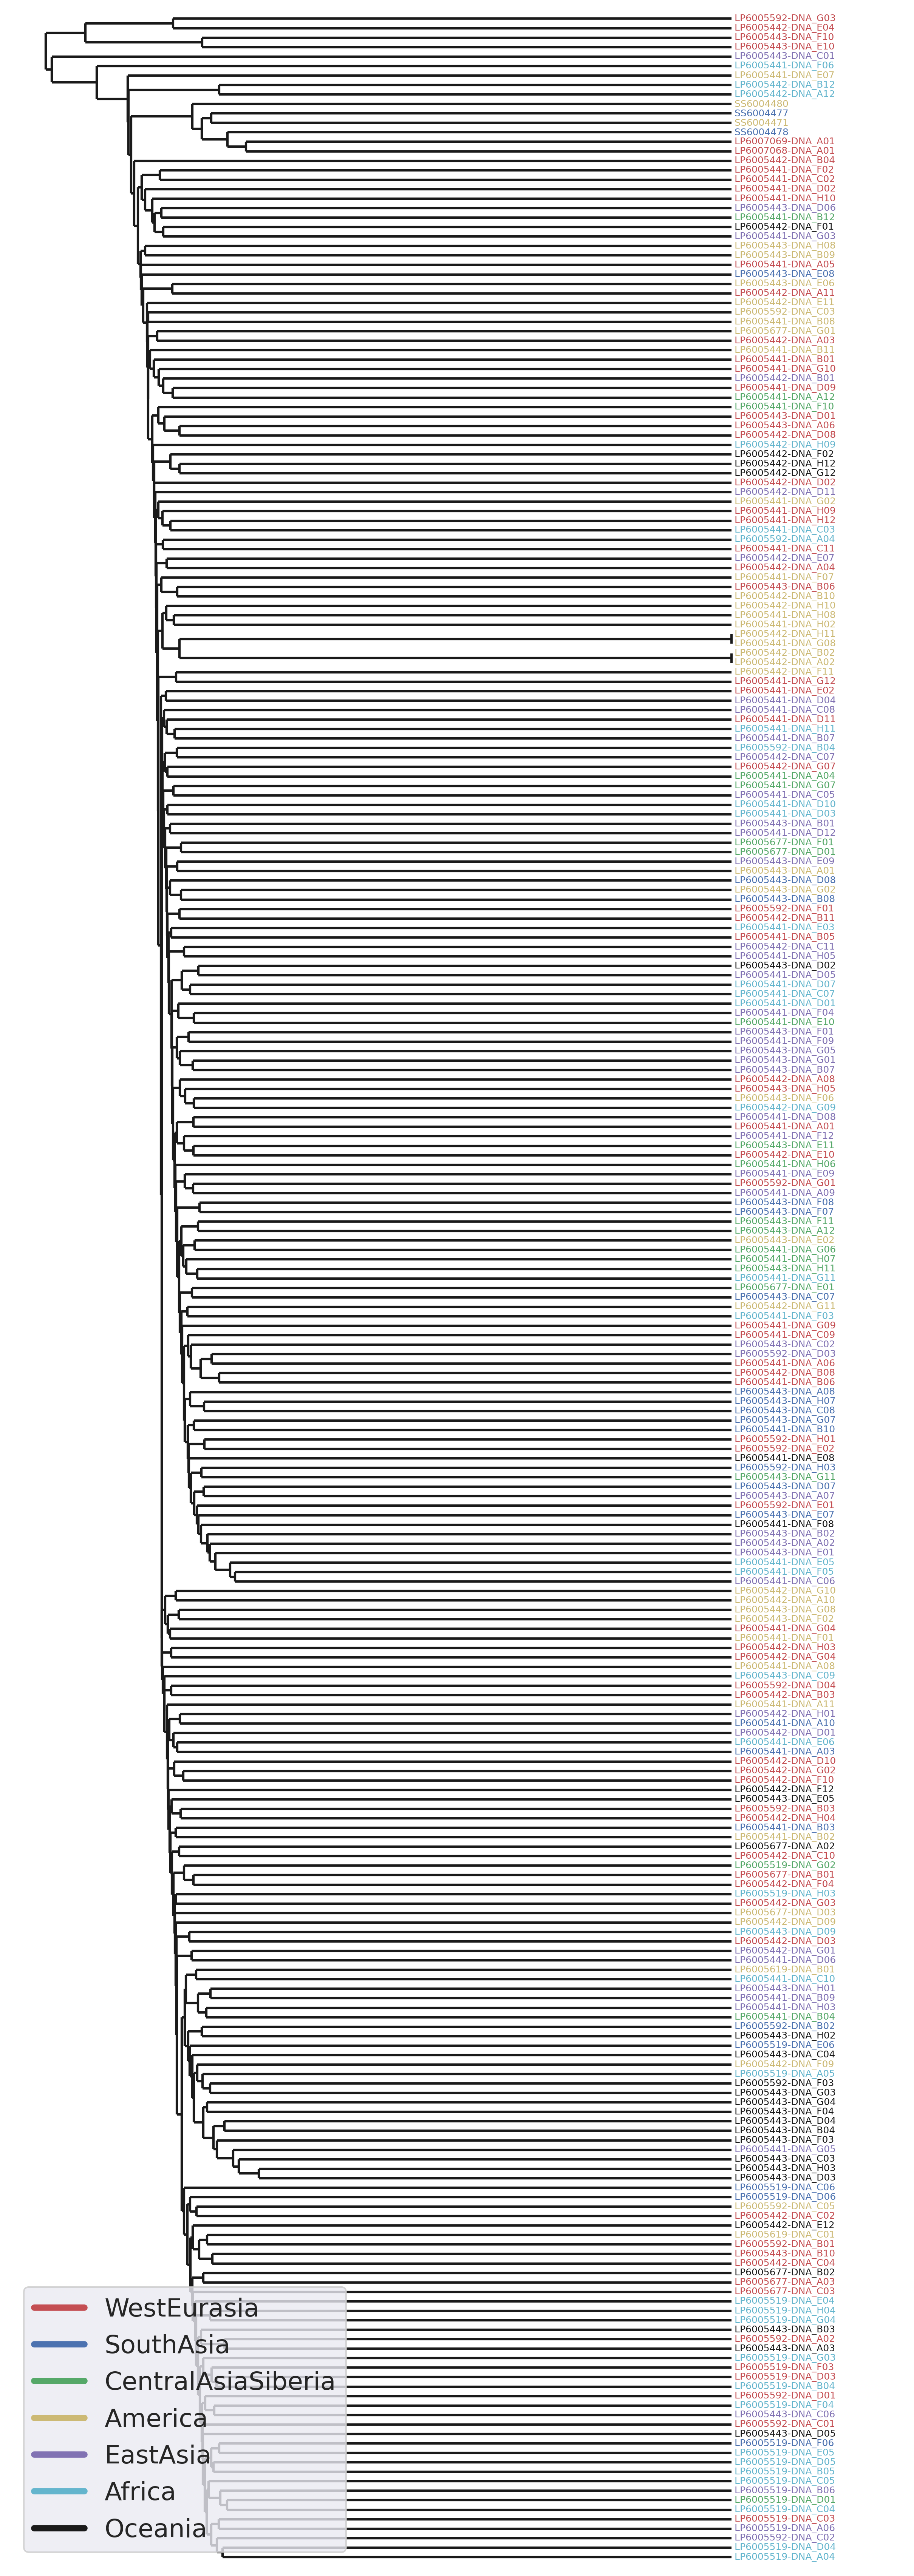

In [110]:
from Bio import Phylo
from io import StringIO 
from matplotlib.lines import Line2D
import pylab

handle = StringIO(str(tree.to_newick(labels=labels, include_distance=True)))
tree_2 = Phylo.read(handle, "newick")
tree_2.ladderize()

matplotlib.rc('font', size=6)
#matplotlib.rc('font', size=6)
    # set the size of the figure
#fig = plt.figure(figsize=(20, 80), dpi=300)
fig = plt.figure(figsize=(10, 70), dpi=300)
    # alternatively
    # fig.set_size_inches(10, 40)
axes = fig.add_subplot(3, 1, 1)
fig.tight_layout()
Phylo.draw(tree_2, 
           axes=axes, 
           do_show=False,
           label_colors= row_color)
pylab.axis('off')

### CUSTOM LEGEND
custom_lines = [Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='y', lw=4),
                Line2D([0], [0], color='m', lw=4),
                Line2D([0], [0], color='c', lw=4),
                Line2D([0], [0], color='k', lw=4)]

#fig, ax = plt.subplots()
plt.legend(custom_lines, ['WestEurasia', 'SouthAsia', 'CentralAsiaSiberia', 'America', 'EastAsia', 'Africa','Oceania'],  loc =3, prop={'size': 16})

#plt.savefig('upgma-tree_euclidean.png')
#plt.legend(row_color, loc ="upper left")
#plt.savefig('upgma-tree.pdf')
#Phylo.write(tree_2, "egfr-family-annotated.xml", "phyloxml")